# <center>SL-Project Part One</center> 

In [218]:
# Importing the libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from collections import Counter

## 1. Import and warehouse data:

### <center>Import all the given datasets and explore shape and size of each

In [219]:
# Importing the datasets by reading the appropriate CSV files

Normal = pd.read_csv('Part1 - Normal.csv')
Type_H = pd.read_csv('Part1 - Type_H.csv')
Type_S = pd.read_csv('Part1 - Type_S.csv')

In [220]:
# Checking the shape of the imported datasets

print('First data set shape:',Normal.shape)
print('Second data set shape:',Type_H.shape)
print('Third data set shape:',Type_S.shape)

First data set shape: (100, 7)
Second data set shape: (60, 7)
Third data set shape: (150, 7)


In [221]:
# Checking the size of the imported datasets

print('First data set size:',Normal.size)
print('Second data set size:',Type_H.size)
print('Third data set size:',Type_S.size)

First data set size: 700
Second data set size: 420
Third data set size: 1050


In [222]:
# Checking the dimension of the imported datasets

print('First data set dimesnion:',Normal.ndim)
print('Second data set dimension:',Type_H.ndim)
print('Third data set dimension:',Type_S.ndim)

First data set dimesnion: 2
Second data set dimension: 2
Third data set dimension: 2


In [223]:
# Checking the length of the imported datasets (Number of rows)

print('First data set length:',len(Normal))
print('Second data set length:',len(Type_H))
print('Third data set length:',len(Type_S))

First data set length: 100
Second data set length: 60
Third data set length: 150


In [224]:
# Checking the information of the imported datasets

print(Normal.info())
print('\n***************************************\n')
print(Type_H.info())
print('\n***************************************\n')
print(Type_S.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
None

***************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non

- Shape, size, dimension, length and information of the given datasets can be seen above. 

### <center>Merge all datasets onto one and explore final shape and size

In [225]:
# Merging the datasets

imported_dfs = [Normal,Type_H,Type_S]
data_merged = pd.concat(imported_dfs,ignore_index=True)

In [226]:
# Range of the dataset

data_merged.index

RangeIndex(start=0, stop=310, step=1)

In [227]:
# Shape of the dataset

data_merged.shape

(310, 7)

In [228]:
# Size of the dataset

data_merged.size

2170

In [229]:
# Length of the dataset
# Number of rows

len(data_merged)

310

In [230]:
# Information about the dataset

data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


## 2.Data cleansing:

### <center>Explore and if required correct the datatypes of each attribute

In [231]:
# Let's first create a copy of our main dataset
data = data_merged.copy()

In [232]:
# Observing the dataset 'data_merged'
# First and last 5 rows displayed

data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [233]:
# Describing the dataset
# Including all the data types

data.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,133
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


- The above data can be used in conjuction with analysis later to draw better inferences.

In [234]:
data.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

- As we can see see from the dataset information we can change the 'Class' data type to categorical.

In [235]:
# Changing 'Class' datatype to categorical

data['Class'] = data['Class'].astype('category')

In [236]:
# Checking the change made to 'Class' column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.2 KB


### <center>Explore for null values in the attributes and if required drop or impute values

In [237]:
# Checking for null values

data.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

- So we can see that we don't have a NULL value for either column.
- Also NULL value doesn't exists in other forms as can be seen from the dataset description and info as well.

In [238]:
# Identifying duplicate records in the data

dupes = data.duplicated()
sum(dupes)

0

In [239]:
# Let's look at random samples
# Run the code multiple times to check

data.sample(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
145,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,type_h
92,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
184,76.326002,42.396204,57.200000,33.929797,124.267007,50.127457,Type_S
115,44.318907,12.537992,36.098763,31.780915,124.115836,5.415825,Type_H
271,78.401254,14.042260,79.694263,64.358994,104.731234,12.392853,Type_S
34,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,Nrmal
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
193,58.101935,14.837639,79.649838,43.264295,113.587655,50.237878,Type_S
235,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,Type_S
78,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247,Normal


In [240]:
# Now let's look at the categorical column 'Class'

data['Class']

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
305    Type_S
306    Type_S
307    Type_S
308    Type_S
309    Type_S
Name: Class, Length: 310, dtype: category
Categories (6, object): ['Normal', 'Nrmal', 'Type_H', 'Type_S', 'tp_s', 'type_h']

In [241]:
# Checking unique value and their counts for 'Class' column

data['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

- As we can see from the data sample,the values in 'Class' column needs to be transformed as values are repeated in different forms which increases the types of 'Class' values despite having the same meaning for names.This error in data needs to be rectified.
- We should have only 3 values for 'Class' column which is 'Normal','Type_H' and 'Type_S'.
- So let's transform the data points.

In [242]:
# Transforming the data points

data['Class'] = data['Class'].map({'Nrmal':'Normal', 'type_h':'Type_H', 'tp_s':'Type_S', 'Normal':'Normal', 'Type_H':'Type_H', 'Type_S':'Type_S'})

In [243]:
# Checking for transformation

data['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

- Now the values seems appropriate.

## 3. Data analysis & visualisation:

### <center>Perform detailed statistical analysis on the data

### <center>Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

In [244]:
# Filtering numerical columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = data.select_dtypes(include=numerics).columns.to_list()

In [245]:
# Function for numeric's analysis of each column passed as a list
# Min, Max, Range, Mean, Median, Standard Deviation, Skewness, Kurtosis

def uva_num(data, data_group):
  
  ''' 
  Univariate Analysis for Numeric:
  takes a group of variables (INTEGER and FLOAT) and plots all the descriptives and properties along with KDE.\n
  
  data : dataframe from which to plot from\n
  
  data_group : {list} type Group of Continuous variables\n

  '''  

  
  size = len(data_group)
  plt.figure(figsize = (8*size,3), dpi = 100)
  
  # Looping for each variable

  for j,i in enumerate(data_group):
    
    # Calculating descriptives of variable
    
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    
    # Calculating points of standard deviation
    
    points = mean-st_dev, mean+st_dev
    
    # Plotting with every information
    
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True,color ='black',alpha=0.5)
    sns.lineplot(points, [0,0], color = 'yellow', label = "std_dev",linewidth = 2.5)
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i))
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),
                                                                                                    round(points[1],2)),
                                                                                                    round(kurt,2),
                                                                                                    round(skew,2),
                                                                                                    (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                    round(mean,2),
                                                                                                    round(median,2)))

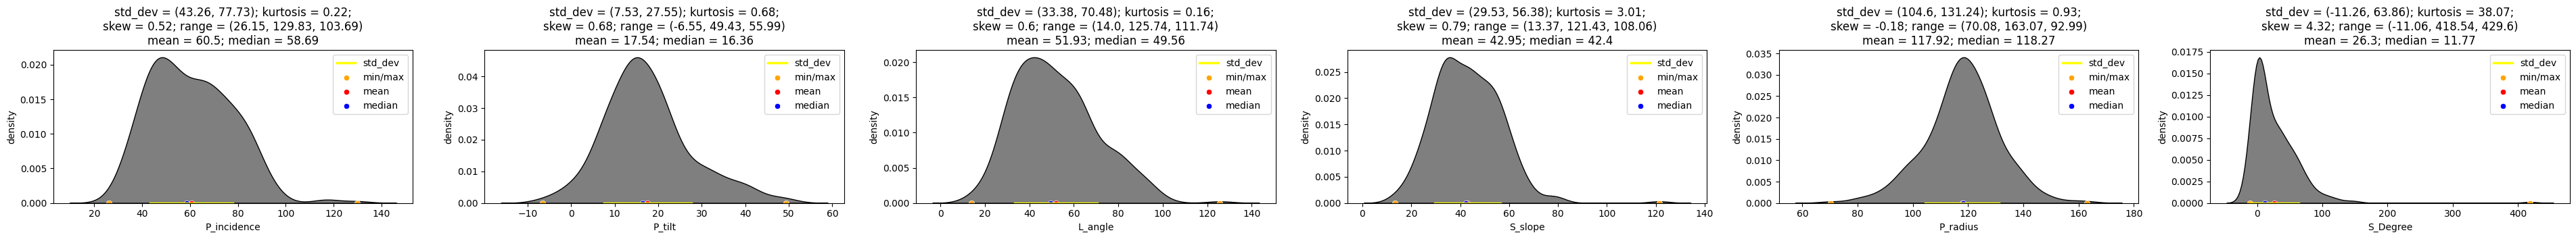

In [246]:
uva_num(data,num_cols)

- Most of the distributions are positively skewed(moderately), except for 'P_radius' and 'S_Degree' which are relatively highly skewed(negative and positive respectively and biased accordingly).
- By observing the above graphs and data we can see that most of the variables depicts Leptokurtic distribution.
- Kurtosis value is reasonably within the range for most with exception of 'S_Degree'.
- So, by observing both kurtosis and skewness, we can sense that in case of most of the variables we have atleast some outliers.

In [247]:
# Custom function for outlier analysis

def uva_outlier(data, data_group, include_outlier = True):
  
  '''
  Univariate Analysis for Outlier:
  takes a group of variables (INTEGER and FLOAT) and plot boxplot and descriptives\n
  
  data : dataframe from which to plot from\n
  
  data_group : {list} type Group of Continuous variables\n
  
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(data_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  # Looping for each variable
  
  for j,i in enumerate(data_group):
    
    # Calculating the descriptives
    
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating number of outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      
      # Plotting with every information
      
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v",color='Cyan')
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      
      # Replacing outliers with max/min whisker
      
      data2 = data[data_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # Plotting without outliers
        
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

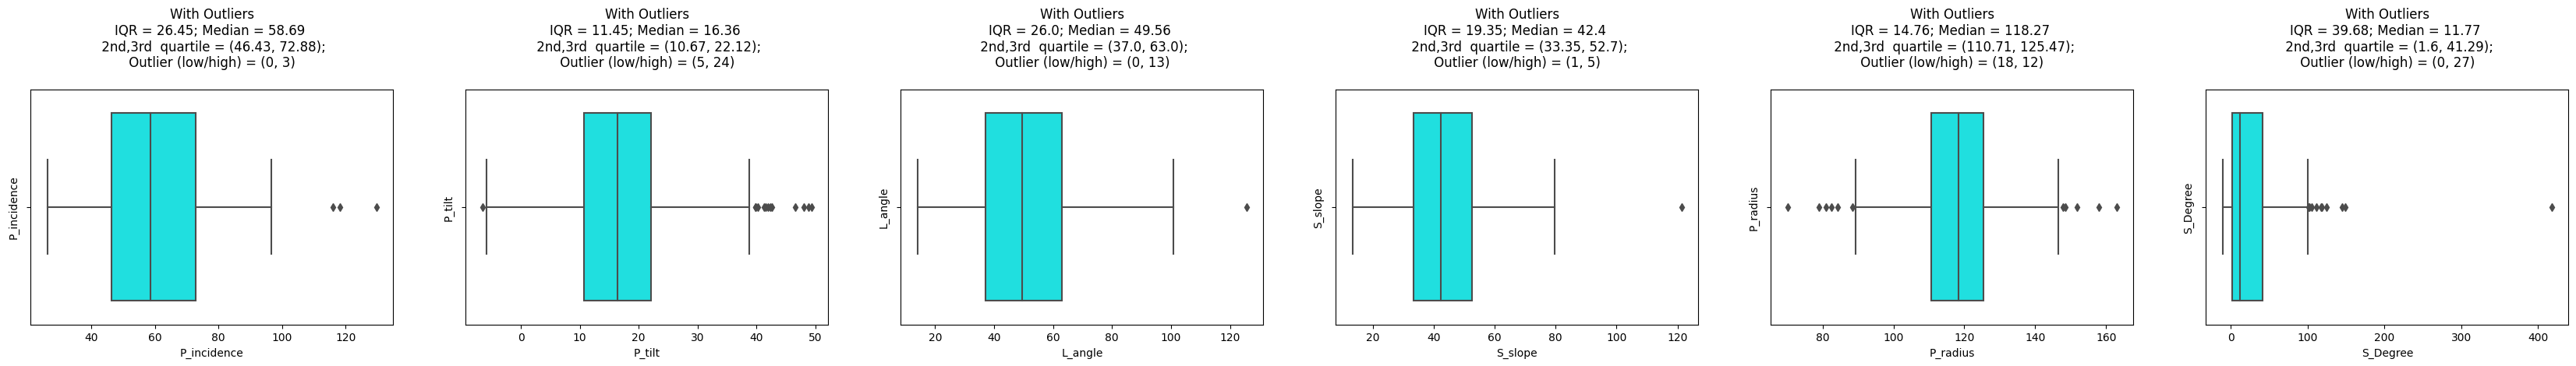

In [248]:
# Representation of data with outliers

uva_outlier(data, num_cols)

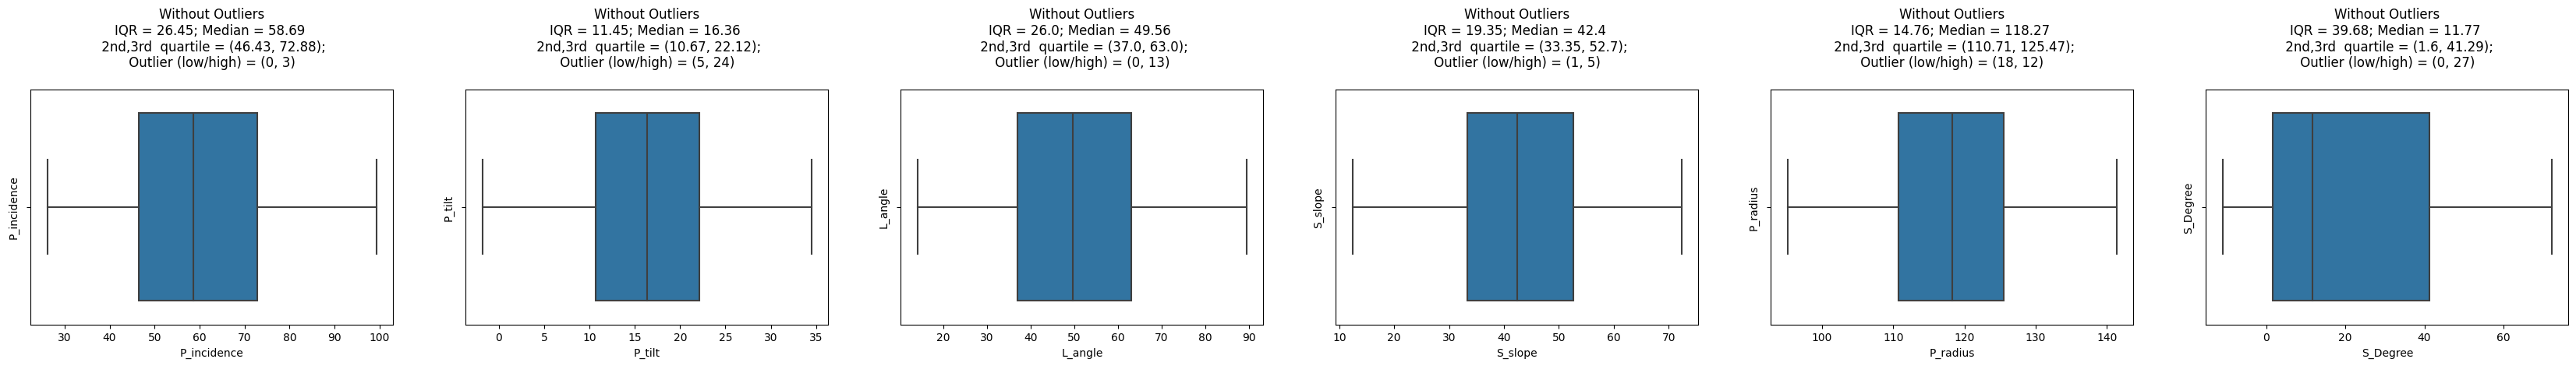

In [249]:
# Representation of data with outliers removed

uva_outlier(data, num_cols,include_outlier=False)

- We can see outliers present in the data but such outliers will be present in a medical data set as patients can be normal or not normal(in which case we have extreme values sometimes).
- Apart from ouliers mentioned above, we can see S_Degree as one too extreme value which seems like an error in data when we observe carefully.
- As we will be using KNN algorithm for our classification here, which is sensitive to outliers then such extreme value can be removed.

In [250]:
# Filtering categorical columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cat_cols = data.select_dtypes(exclude = numerics).columns.to_list()

In [251]:
cat_cols

['Class']

- So, we have only one categorical column as we have seen earlier too.

In [252]:
# Percentage of each of the three class in the data

data[cat_cols].value_counts(normalize=True)*100

Class 
Type_S    48.387097
Normal    32.258065
Type_H    19.354839
dtype: float64

In [253]:
# Checking distribution of data points across classes of 'Class'

data.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


In [254]:
def uva_cat(data, var_group):

  '''
  Univariate Analysis for Categorical:
  takes a group of variables (category) and plot all the value_counts and barplot along with descriptives.
  '''
  
  size = len(var_group)
  plt.figure(figsize = (9*size,2), dpi = 100)

  # Loop for every variable

  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index,palette='rocket')
    plt.xlabel('Fraction/Percent', fontsize = 15)
    plt.ylabel('{}'.format(i), fontsize = 15)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

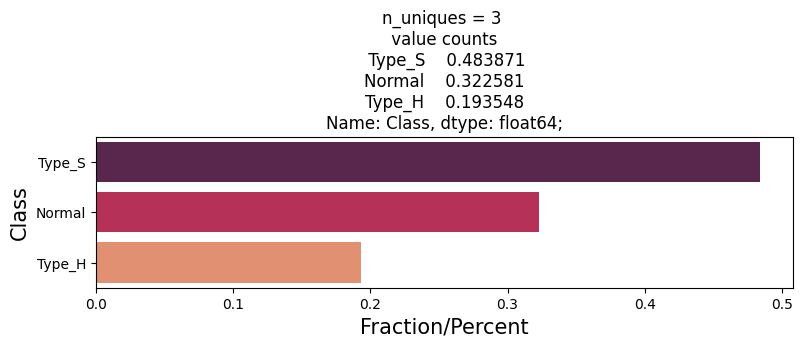

In [255]:
uva_cat(data, cat_cols)

- From the graph and values we can see that patients with 'Types_S' are in majority, followed by 'Normal' patients and then by 'Type_H'. 
- Thus,we can see that almost 32% of the patients are normal and majority of them have some health related issues.

In [256]:
# Calculating correlation

corr = data[num_cols].corr()
corr

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


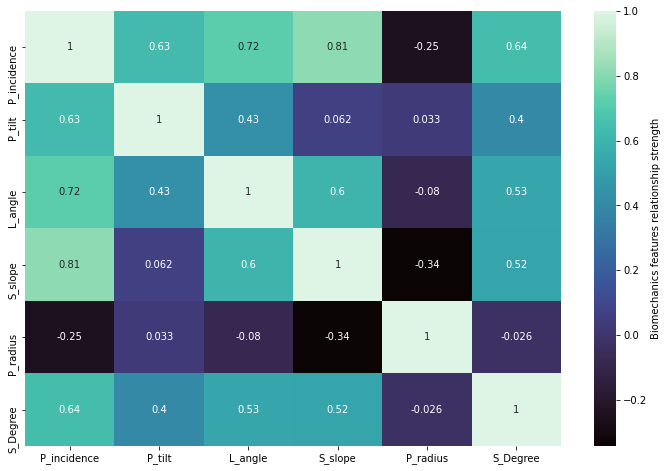

In [257]:
# Plotting the heatmap for the respective correlation

plt.figure(figsize=(12,8))

sns.heatmap(corr,annot=True,cbar_kws={'label': 'Biomechanics features relationship strength'},cmap='mako');

In [258]:
# Representing correlation values in hierarchy (Descending order)

df_corr = pd.DataFrame(corr.abs().unstack().sort_values(ascending=False),columns=['Correlation'])
df_corr

,,Correlation
P_incidence,P_incidence,1.000000
P_tilt,P_tilt,1.000000
P_radius,P_radius,1.000000
S_slope,S_slope,1.000000
L_angle,L_angle,1.000000
S_Degree,S_Degree,1.000000
P_incidence,S_slope,0.814960
S_slope,P_incidence,0.814960
L_angle,P_incidence,0.717282
P_incidence,L_angle,0.717282


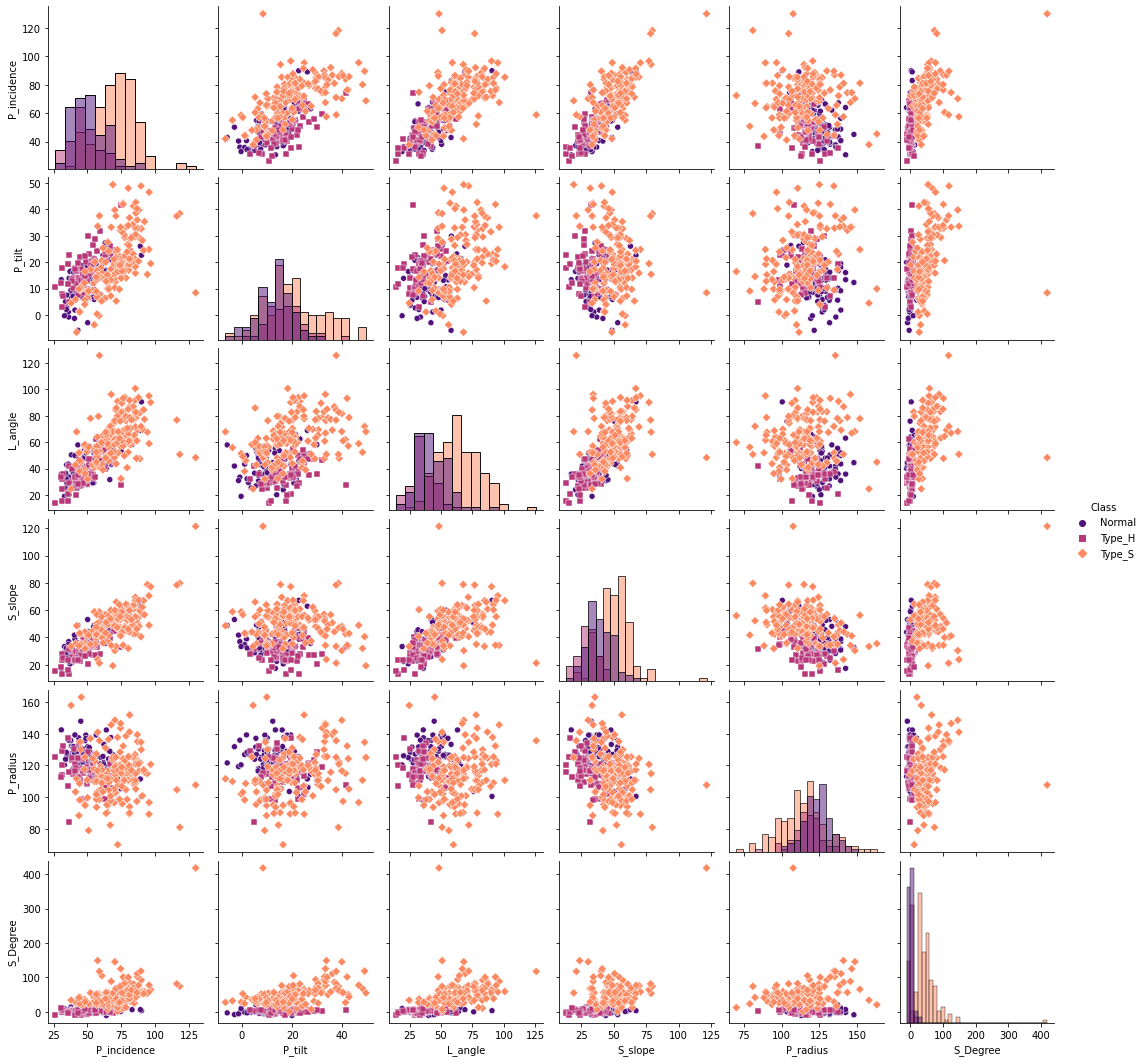

In [259]:
# Plot to check the correlation

sns.pairplot(data,hue='Class',markers=['o', 's', 'D'],diag_kind='hist',palette='magma');

**Observation from Correlation Matrix,Pair Plots and Heatmap :**
- We can see few decent correlations betweeen multiple columns in the correlation matrix.
- We can see partially linear relationships between different columns.
- Some of the values in the light shaded region increase almost linearly with each other owing to positive correlation.
- We do have few negative correlations but not strong enough.
- We will further exploit the relationships based on our approach.

In [260]:
# Creating the pivot table based on 'Class' column
# Using aggregate function as minimum

pd.pivot_table(data, index =['Class'],aggfunc=min)

,L_angle,P_incidence,P_radius,P_tilt,S_Degree,S_slope
Class,,,,,,
Normal,19.071075,30.741938,100.501192,-5.845994,-11.058179,17.386972
Type_H,14.000000,26.147921,84.241415,3.144669,-10.675871,13.366931
Type_S,24.710274,37.903910,70.082575,-6.554948,1.010041,19.290046


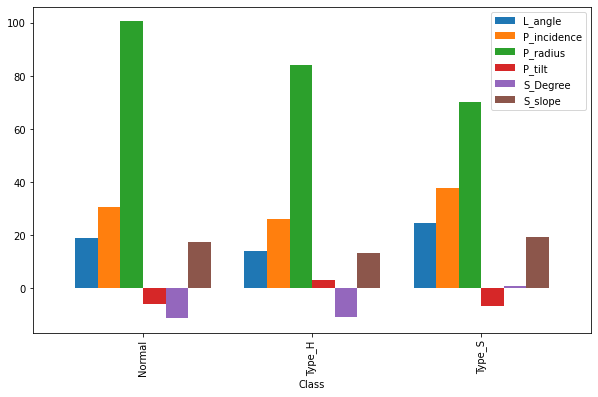

In [261]:
# Plotting the above values

pd.pivot_table(data, index =['Class'],aggfunc=min).plot(kind='bar',figsize=(10,6),width =0.8);

In [262]:
# Creating the pivot table based on 'Class' column
# Using aggregate function as maximum

pd.pivot_table(data, index =['Class'],aggfunc=max)

,L_angle,P_incidence,P_radius,P_tilt,S_Degree,S_slope
Class,,,,,,
Normal,90.563461,89.834676,147.894637,29.894119,31.172767,67.195460
Type_H,62.275275,74.433593,137.540613,41.557331,15.779697,46.613539
Type_S,125.742385,129.834041,163.071041,49.431864,418.543082,121.429566


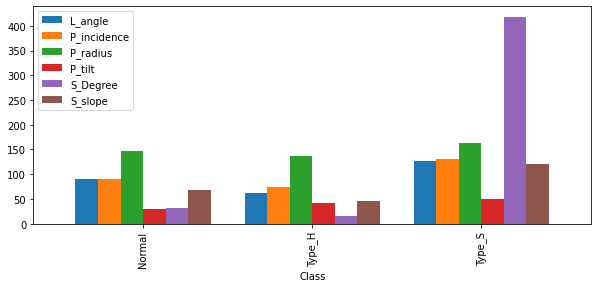

In [263]:
# Plotting the above values

pd.pivot_table(data, index =['Class'],aggfunc=max).plot(kind='bar',figsize=(10,4),width =0.8);

In [264]:
# Creating the pivot table based on 'Class' column
# Using aggregate function as mean(default)

pd.pivot_table(data, index =['Class'])

,L_angle,P_incidence,P_radius,P_tilt,S_Degree,S_slope
Class,,,,,,
Normal,43.542605,51.685244,123.890834,12.821414,2.186572,38.863830
Type_H,35.463524,47.638407,116.474968,17.398795,2.480251,30.239612
Type_S,64.110108,71.514224,114.518810,20.748038,51.896687,50.766186


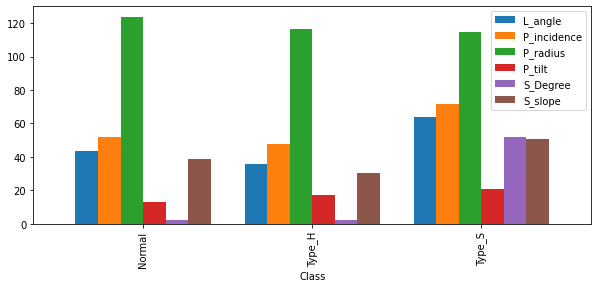

In [265]:
# Plotting the above values

pd.pivot_table(data, index =['Class']).plot(kind='bar',figsize=(10,4),width =0.8);

- Here,above we checked the distribution of values of data points across different variables for the the 3 classes of value 'Class'.
- As, we can see significant difference between each class for different features we can say each feature is important for our analysis.

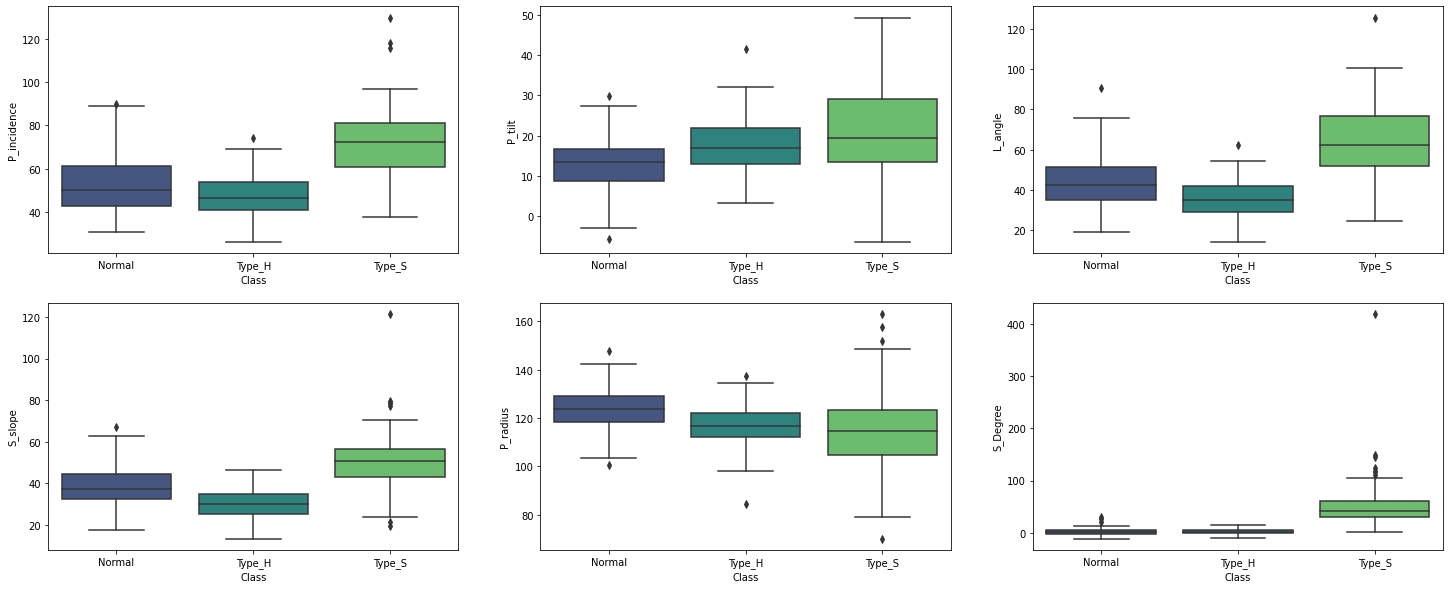

In [266]:
# Creating boxplot for each variable  based on each class of the target variable

plt.figure(figsize=(25,10))
for i, j in enumerate(data[num_cols]):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='Class', y=j, data=data,palette='viridis')

- As, we can see significant difference between each class for different features we can say each feature is important in our analysis.

In [267]:
# Changing the form of the data for visualizations

data_melt = pd.melt(data, id_vars=cat_cols, value_vars=num_cols, var_name='X', value_name='Y')

In [268]:
data_melt

,Class,X,Y
0,Normal,P_incidence,38.505273
1,Normal,P_incidence,54.920858
2,Normal,P_incidence,44.362490
3,Normal,P_incidence,48.318931
4,Normal,P_incidence,45.701789
...,...,...,...
1855,Type_S,S_Degree,100.292107
1856,Type_S,S_Degree,77.283072
1857,Type_S,S_Degree,73.388216
1858,Type_S,S_Degree,76.730629


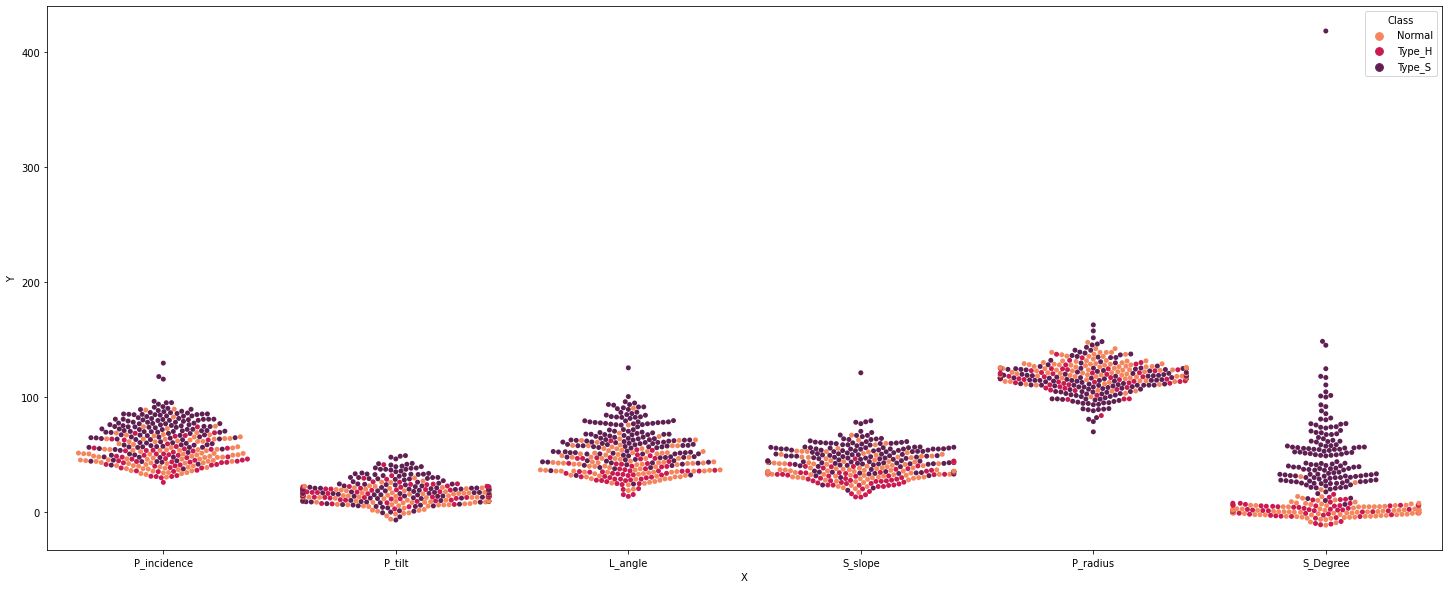

In [269]:
# Swarmplot for analysing the different attributes

plt.figure(figsize = (25,10))
sns.swarmplot(x = 'X', y = 'Y', data = data_melt, hue = 'Class', palette='rocket_r')
plt.show()


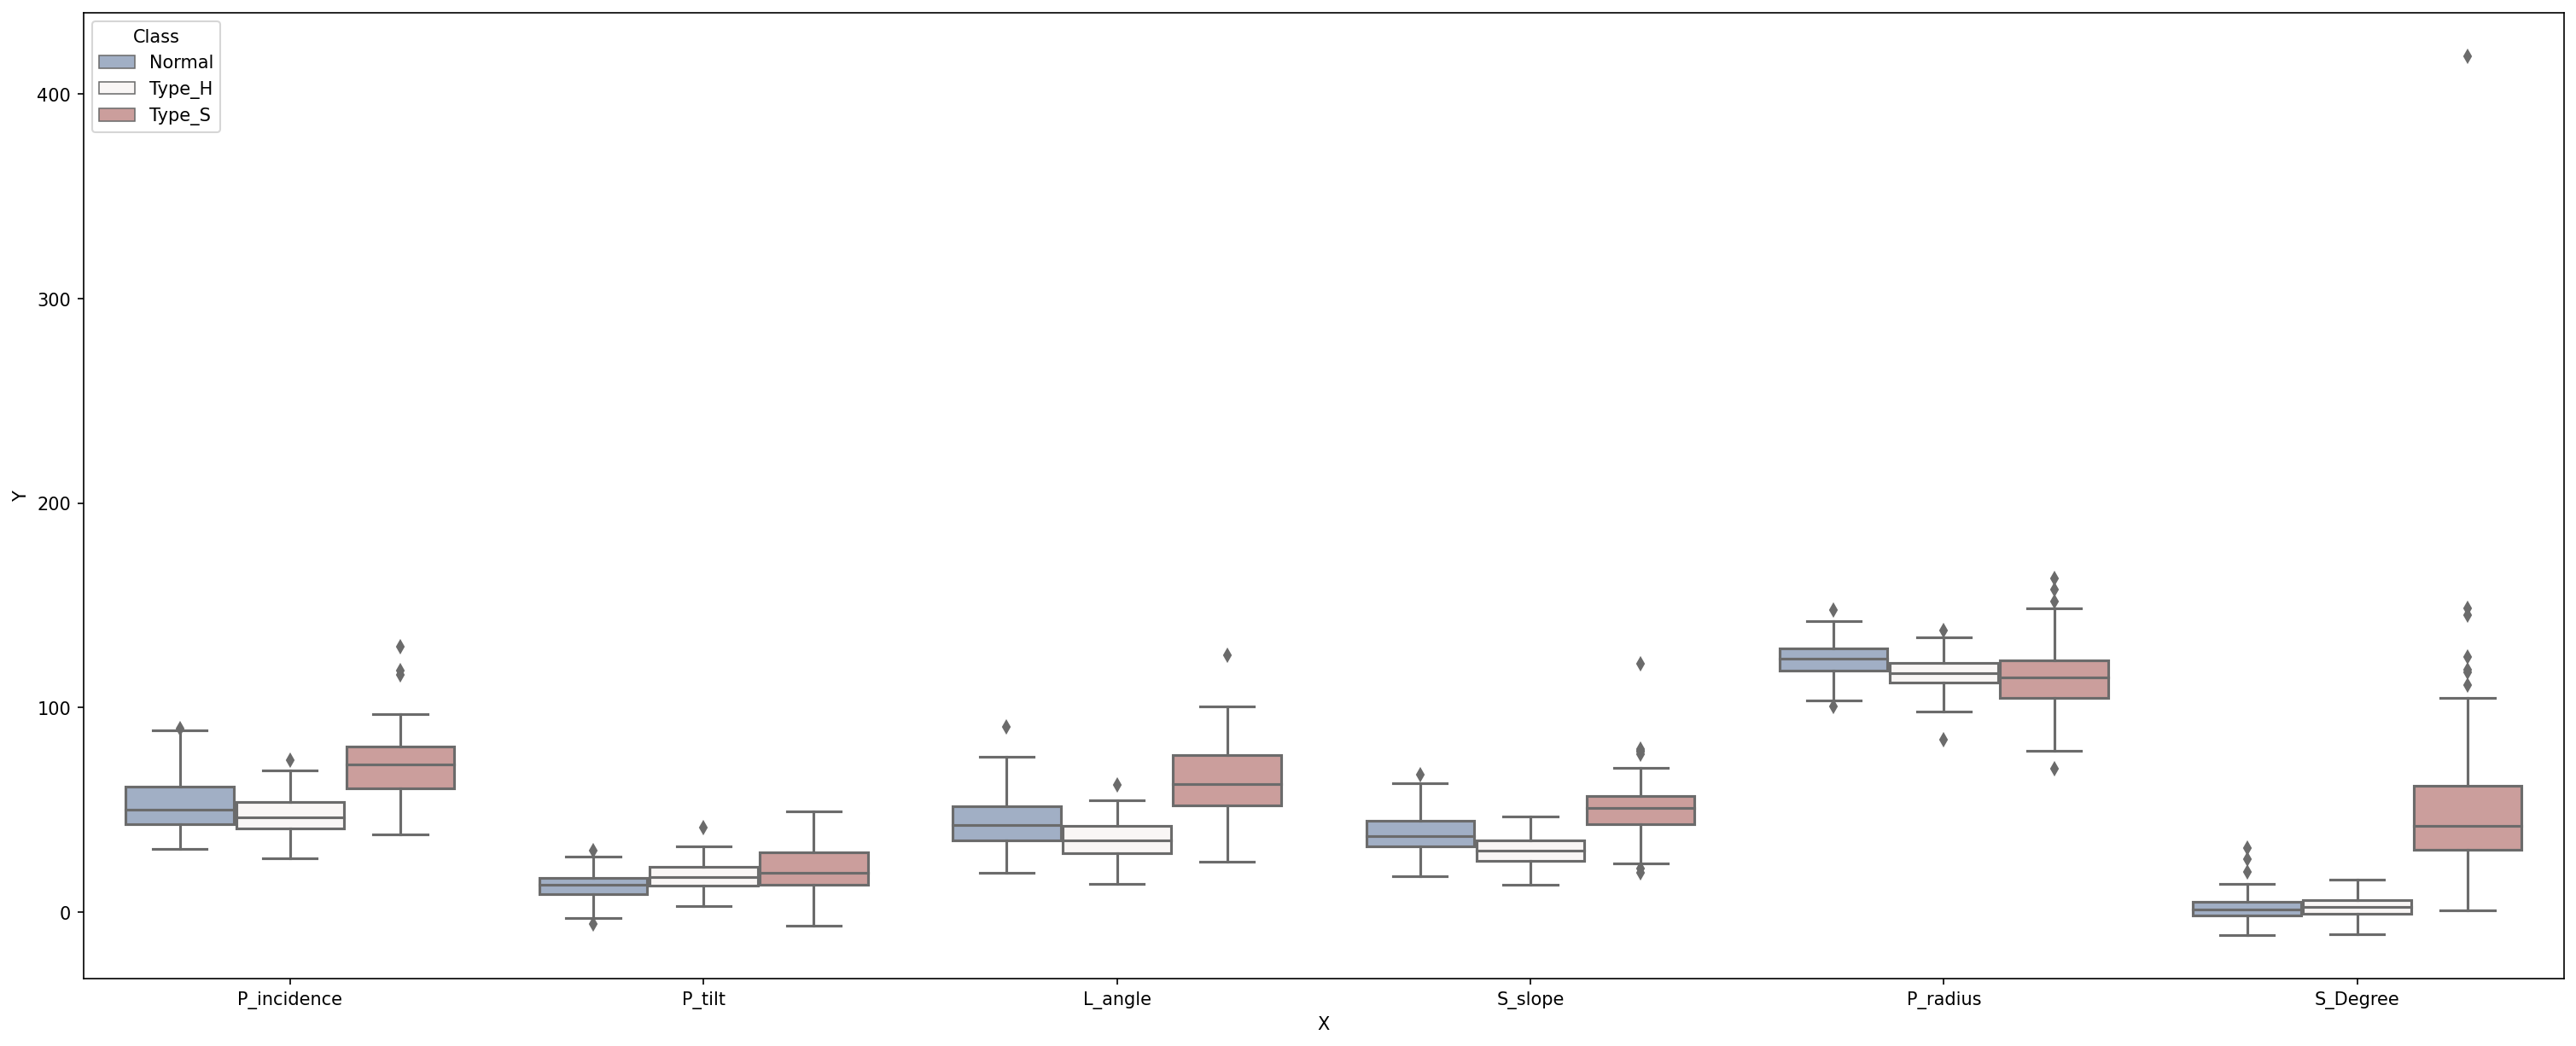

In [270]:
# Boxplot for analysing the different attributes

plt.figure(figsize=(25,10), dpi=150)
sns.boxplot( x='X',y='Y', data=data_melt,hue='Class',palette='vlag')
plt.show()

- The swarm and box plot shows the range of values in which each variable lies for each class of 'Class'.
- Distinction can be see for class 'Type_S' as they are more in number and it's range of values is indifferent to that of other two classes which have similar range of values and that's why the overalapping.
- Also here, we see a value in top right corner which will be dealt with later.

## 4. Data pre-processing:

In [271]:
# Checking the too extreme oulier value in 'S_Degree'(mentioned before in univariate analysis)

data['S_Degree'].max()

418.5430821

In [272]:
data.shape

(310, 7)

In [273]:
# Seeing the distribution we can keep the cap value at 200 for this column
# Let's transform the data

data = data[data['S_Degree'] < 200]

In [274]:
# Checking data shape after outlier removal

data.shape

(309, 7)

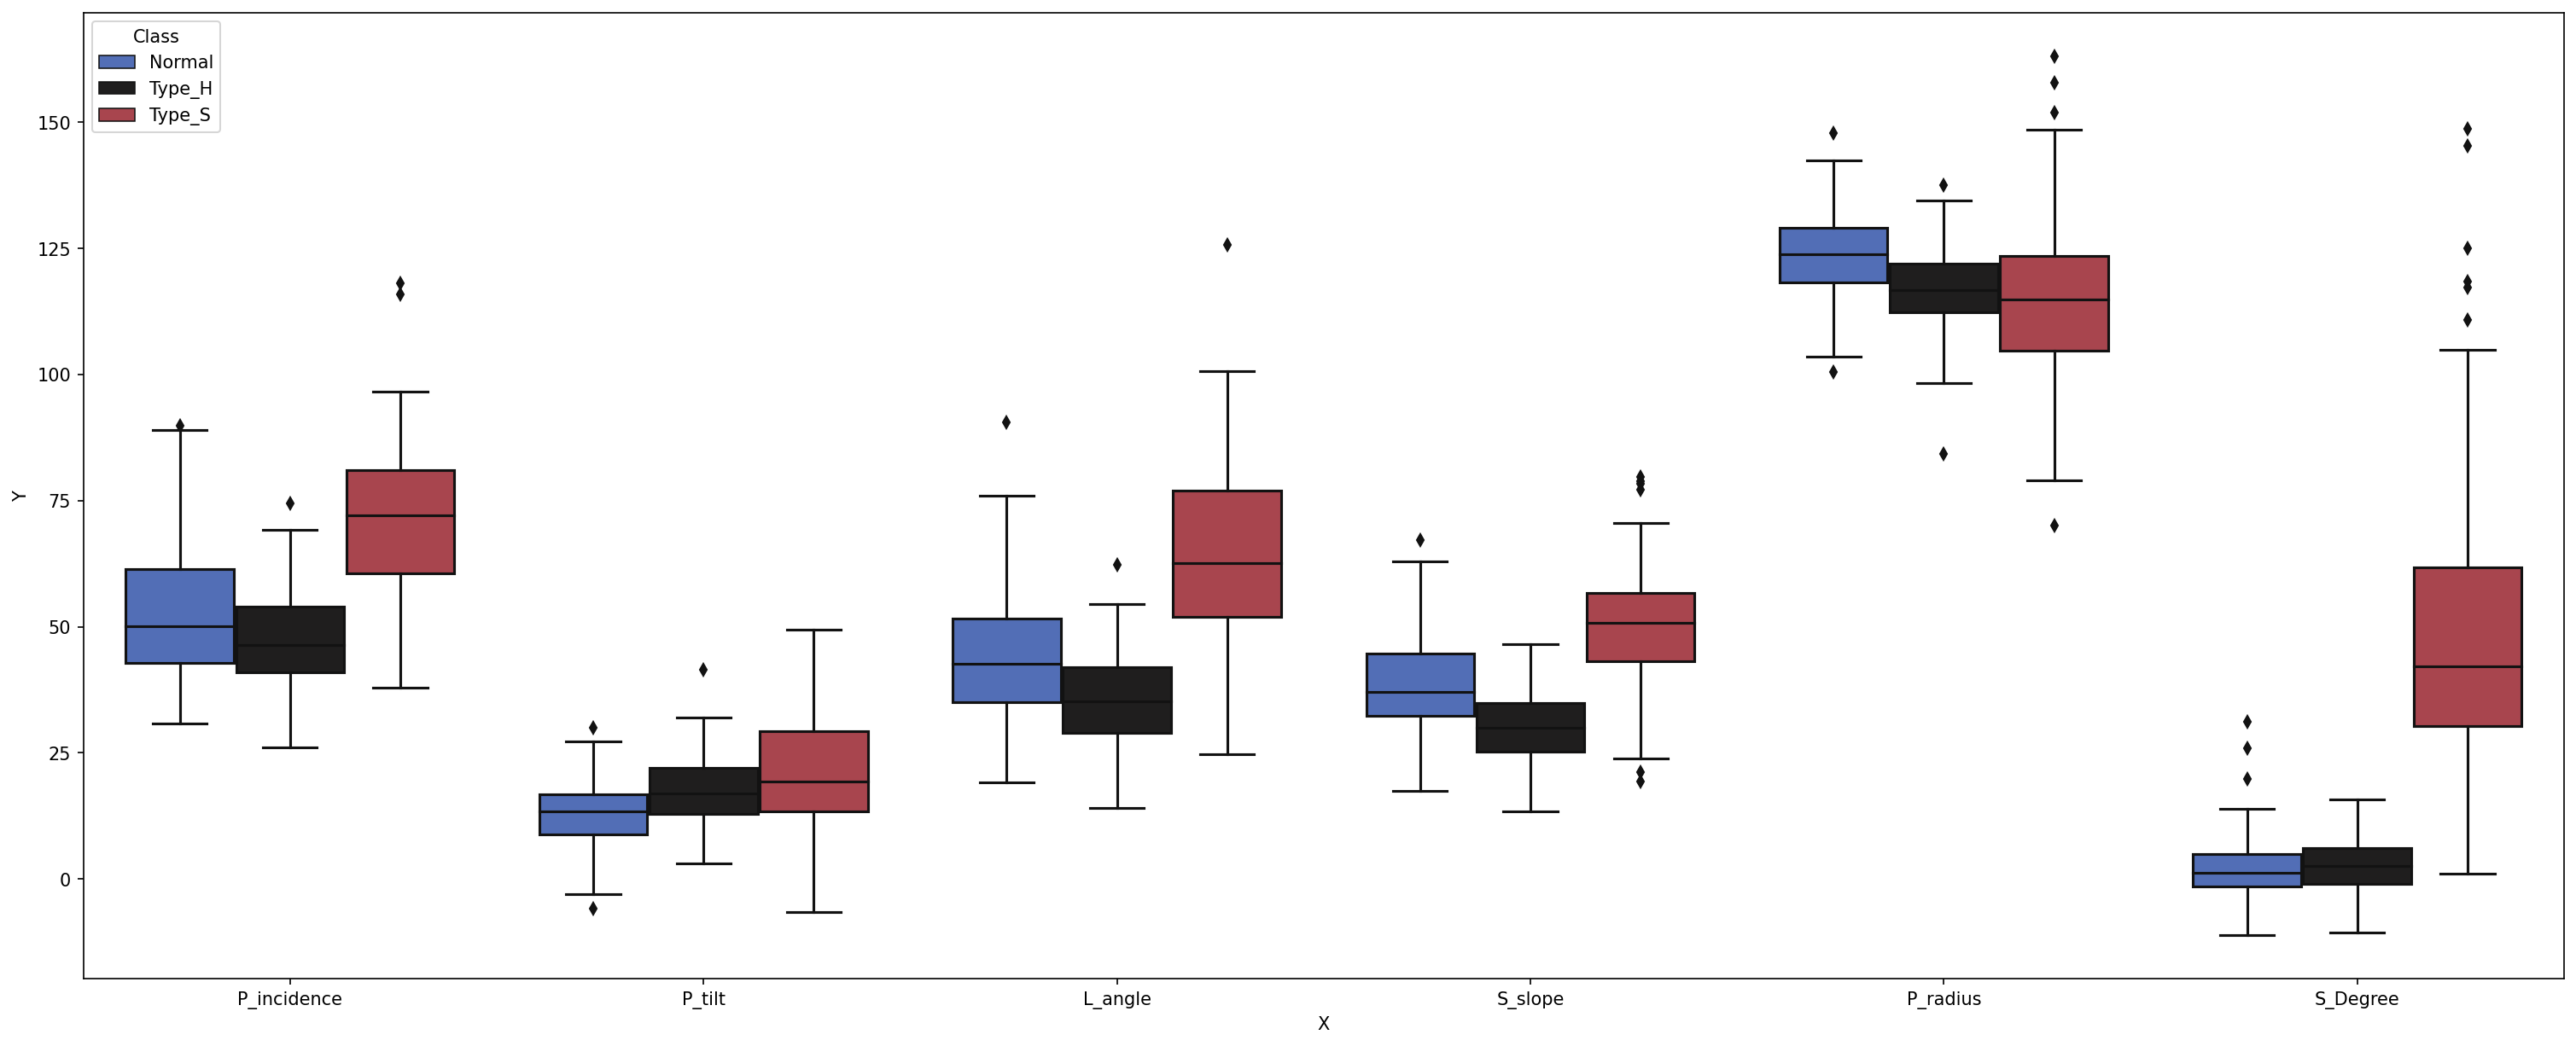

In [275]:
# Checking how the distribution changes by removing just one outlier 

data_melt = pd.melt(data, id_vars=cat_cols, value_vars=num_cols, var_name='X', value_name='Y')
plt.figure(figsize=(25,10), dpi=150)
sns.boxplot(y='Y', x='X', data=data_melt,hue='Class',palette='icefire')
plt.show()

### <center>Segregate predictors vs target attributes

In [276]:
data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [277]:
# Segregating predictors and target attribute

X = data.drop(labels= 'Class' , axis = 1)
y = data['Class']

In [278]:
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [279]:
y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Class, dtype: object

In [280]:
y.tail()

305    Type_S
306    Type_S
307    Type_S
308    Type_S
309    Type_S
Name: Class, dtype: object

### <center>Perform normalisation or scaling if required

- Generally, for good performance out of KNN model usually it requires preprocessing of data to make all variables similarly scaled and centered so we shall perform scaling.

In [281]:
# Scaling the data 

X_scaled=MinMaxScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=num_cols)

- Tried Standard Scaler before but got better results with the above.

In [282]:
# Scaled values can be seen below

X_scaled

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,0.134324,0.420085,0.188942,0.123236,0.618897,0.119170
1,0.312760,0.455882,0.336501,0.340511,0.599688,0.081720
2,0.197991,0.276858,0.294446,0.332440,0.635973,0.100445
3,0.240998,0.428799,0.304271,0.263838,0.633388,0.063495
4,0.212550,0.307480,0.255748,0.326784,0.646271,0.047989
...,...,...,...,...,...,...
304,0.586582,0.723338,0.636299,0.494544,0.596967,0.696758
305,0.753639,0.948527,0.402712,0.536171,0.286071,0.552783
306,0.521179,0.453297,0.555135,0.631768,0.627209,0.528411
307,0.668841,0.480838,0.714343,0.813327,0.546974,0.549326


### <center>Check for target balancing. Add your comments

In [283]:
# The distribution of data points across classes of 'Class'

data.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,149,149,149,149,149,149


In [284]:
data['Class'].value_counts()

Type_S    149
Normal    100
Type_H     60
Name: Class, dtype: int64

- As can be seen from the information above the classes are not balanced.
- We can do oversampling over undersampling as our dataset is small and we can loose important information.
- One thing to be noted here is that we shall only oversample the training data as we don't know for sure whether our test data which is the future data will come as balanced or imbalanced.
- We shall first check our metrics under consideration and later while tuning the hyperparametes we can balance the data to see if there is a significant gain in the performance of the model.

In [285]:
# Encoding the classes of 'Class'

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(data['Class'])  


In [286]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### <center>Perform train-test split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=30,stratify=y)

In [288]:
X.shape

(309, 6)

In [289]:
y.shape

(309,)

In [290]:
# Training data

print(X_train.shape)
print(y_train.shape)

(231, 6)
(231,)


In [291]:
# Testing data

print(X_test.shape)
print(y_test.shape)

(78, 6)
(78,)


## 5. Model training, testing and tuning:

### <center>Design and train a KNN classifier

**Model-I**

In [292]:
# Instantiating the model
# Taking default k value which is 5

knn = KNeighborsClassifier()

# Fitting the model

knn.fit(X_train, y_train)

KNeighborsClassifier()

### <center>Display the classification accuracies for train and test data

In [293]:
# Predicting the response for training data

y_pred = knn.predict(X_train)

# Evaluate accuracy

print(accuracy_score(y_train, y_pred))

0.8658008658008658


In [294]:
# Predicting the response for testing data

y_pred = knn.predict(X_test)

# Evaluate accuracy

print(accuracy_score(y_test, y_pred))

0.8333333333333334


### <center>Display and explain the classification report in detail

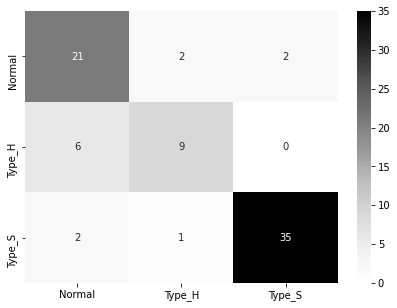

In [295]:
# Generating confusion matrix and plotting as heatmap

cm = confusion_matrix(y_test, y_pred)
# cm
df_cm = pd.DataFrame(cm, index = ['Normal','Type_H','Type_S'],
                  columns = [i for i in ['Normal','Type_H','Type_S']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Greys')
plt.show()

In [296]:
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        25
           1       0.75      0.60      0.67        15
           2       0.95      0.92      0.93        38

    accuracy                           0.83        78
   macro avg       0.81      0.79      0.79        78
weighted avg       0.84      0.83      0.83        78



- As the classes are imbalanced, we have to look for more than just accuracy and just can't rely on just this metric for performance.
- According to our context, our primary goal is to identify patients with issues such as 'Type_H' and "Type_S' and in such process we identify 'Normal' wrongly as other two categories, is not a current concern.
- So, the most important metric to consider is recall as we need to correctly identify patients with issues.
- Recall value of 'TypeH' and 'TypeS' should be considered here for improvisation with priority.

### <center>Automate the task of finding best values of K for KNN

In [297]:
def k_calc(x,y):
    '''
    Function to find optimal value of k and missclassification error
    '''
    X_train = x
    y_train = y
    # Empty list that will hold accuracy scores
    ac_scores = []

    # Iterating on given range of k values
    for k in neighbors:
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Predict the response
        y_pred = knn.predict(X_test)
        
        # Evaluate accuracy
        scores = accuracy_score(y_test, y_pred)
        
        # Append the accuracy values for each k
        ac_scores.append(scores)

    # Calculating misclassification error
    MCE = [1 - x for x in ac_scores]

    # Determining the best k
    optimal_k = neighbors[MCE.index(min(MCE))]
    
    return(optimal_k,MCE)

### <center>Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model

In [298]:
# Creating list of K for KNN

myList = list(range(1,20))
neighbors = myList

In [299]:
print("The optimal number of neighbors is",k_calc(X_train,y_train)[0])

The optimal number of neighbors is 5


- Here we can see that the default value comes out to be  optimum.

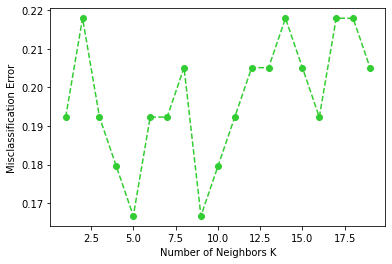

In [300]:
# Plotting misclassification error vs k

MCE = k_calc(X_train,y_train)[1]
plt.plot(neighbors, MCE,'o--',color ='limegreen')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

**MODEL-II**

In [301]:
# Substituting the optimal k value

knn = KNeighborsClassifier(5)

# Fitting the model

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [302]:
# Predicting the response for training data

y_pred = knn.predict(X_train)

# Evaluating accuracy

print(accuracy_score(y_train, y_pred))

0.8658008658008658


In [303]:
# Predicting the response for testing data

y_pred = knn.predict(X_test)

# Evaluating accuracy

print(accuracy_score(y_test, y_pred))

0.8333333333333334


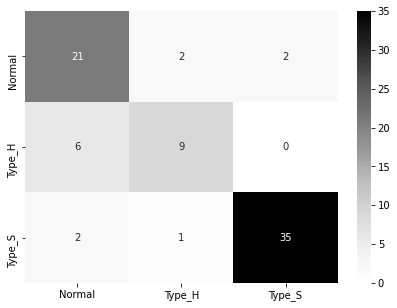

In [304]:
# Generating confusion matrix and plotting as heatmap

cm = confusion_matrix(y_test, y_pred,labels=[0,1,2])
# cm
df_cm = pd.DataFrame(cm, index = [i for i in ['Normal','Type_H','Type_S']],
                  columns = [i for i in ['Normal','Type_H','Type_S']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Greys')
plt.show()

In [305]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        25
           1       0.75      0.60      0.67        15
           2       0.95      0.92      0.93        38

    accuracy                           0.83        78
   macro avg       0.81      0.79      0.79        78
weighted avg       0.84      0.83      0.83        78



**Let's take some more hyper parameters other than k as well and check the performance**

In [306]:
n_neighbors = [i+1 for i in range(20)]

weights = ['uniform','distance']

metric =  ['minkowski','euclidean','manhattan']

# Tried algorithm which comes out auto everytime and keeping this makes the code slow hence removed.

param_grid = dict(n_neighbors=n_neighbors, weights=weights,metric= metric)

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=param_grid, verbose=1, n_jobs=-1,scoring='accuracy',cv=2)

grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_) 


Fitting 2 folds for each of 120 candidates, totalling 240 fits
Best Score:  0.7791229385307346
Best Params:  {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'distance'}


**Model-III**

In [307]:
# Substituting the optimal values of hyperparameters

knn = KNeighborsClassifier(n_neighbors=8,metric='minkowski',weights='distance')

# Fitting the model

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [308]:
# Predict the response for testing data

y_pred = knn.predict(X_test)

# Evaluate accuracy

print(accuracy_score(y_test, y_pred))

0.8076923076923077


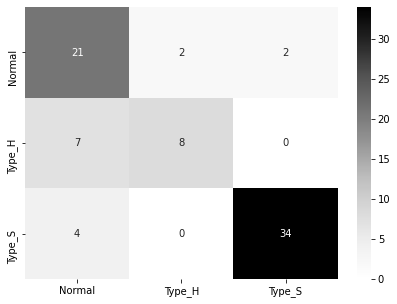

In [309]:
cm = confusion_matrix(y_test, y_pred)
cm
df_cm = pd.DataFrame(cm, index = [i for i in ['Normal','Type_H','Type_S']],
                  columns = [i for i in ['Normal','Type_H','Type_S']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Greys')
plt.show()

In [310]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        25
           1       0.80      0.53      0.64        15
           2       0.94      0.89      0.92        38

    accuracy                           0.81        78
   macro avg       0.80      0.76      0.77        78
weighted avg       0.82      0.81      0.81        78



- The important recall values went down here.
- As we can see the tuning of the additional hyperparameters didn't contribute much to the cause.
- So, let's try tuning just k itself.

In [311]:
score_list_train = []
score_list_test = []

# Here we are calculating train and test score for different values of k
# We shall compare both the scores graphically to best value of k which optimises the metrics of interest

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_list_train.append(knn.score(X_train, y_train))
    score_list_test.append(knn.score(X_test, y_test))

In [312]:
score_list_train

[1.0,
 0.9090909090909091,
 0.9134199134199135,
 0.8701298701298701,
 0.8658008658008658,
 0.8744588744588745,
 0.8701298701298701,
 0.8571428571428571,
 0.8398268398268398,
 0.8441558441558441,
 0.8311688311688312,
 0.8398268398268398,
 0.8311688311688312,
 0.8398268398268398,
 0.8181818181818182,
 0.8138528138528138,
 0.8095238095238095,
 0.8138528138528138,
 0.8138528138528138]

In [313]:
score_list_test

[0.8076923076923077,
 0.782051282051282,
 0.8076923076923077,
 0.8205128205128205,
 0.8333333333333334,
 0.8076923076923077,
 0.8076923076923077,
 0.7948717948717948,
 0.8333333333333334,
 0.8205128205128205,
 0.8076923076923077,
 0.7948717948717948,
 0.7948717948717948,
 0.782051282051282,
 0.7948717948717948,
 0.8076923076923077,
 0.782051282051282,
 0.782051282051282,
 0.7948717948717948]

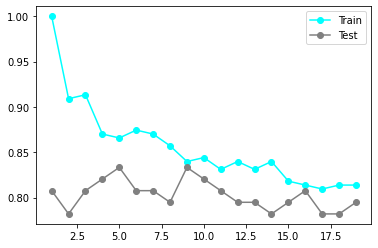

In [314]:
# Plotting the scores to check minimum difference between them

plt.plot(range(1,20),score_list_train,'-o', label = "Train",color ='cyan')
plt.plot(range(1,20),score_list_test,'-o', label = "Test",color ='grey')
plt.legend()
plt.show()

In [315]:
# Here we are considering k values where train and test scores are similar

diff = pd.Series(score_list_train) - pd.Series(score_list_test)

In [316]:
# Converting difference to proper percentage and analysing

diff.sort_values()*100

# Please note we are adding 1 to get k value as per the index below which ranges from 0 to 18

15     0.616051
8      0.649351
18     1.898102
14     2.331002
10     2.347652
9      2.364302
16     2.747253
17     3.180153
4      3.246753
12     3.629704
11     4.495504
3      4.961705
13     5.777556
7      6.227106
6      6.243756
5      6.676657
2     10.572761
1     12.703963
0     19.230769
dtype: float64

**Model IV(x)**

In [317]:
# Taking k values corresponding to upto 4% divergence between the scores

k_list = [16,9,19,15,11,10,17,18,5,13]

In [318]:
# Displaying classification reports for each value of k identified above 
# As we are interested in more than just accuracy

for i in range(len(k_list)):
    knn = KNeighborsClassifier(n_neighbors = k_list[i])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Here K value is',k_list[i],'.')
    print("\nClassification Report :-\n")
    print(classification_report(y_test, y_pred))
    print("\n*********************\n")

Here K value is 16 .

Classification Report :-

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        25
           1       0.78      0.47      0.58        15
           2       0.94      0.89      0.92        38

    accuracy                           0.81        78
   macro avg       0.80      0.75      0.75        78
weighted avg       0.82      0.81      0.80        78


*********************

Here K value is 9 .

Classification Report :-

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        25
           1       0.77      0.67      0.71        15
           2       0.94      0.89      0.92        38

    accuracy                           0.83        78
   macro avg       0.81      0.80      0.80        78
weighted avg       0.84      0.83      0.83        78


*********************

Here K value is 19 .

Classification Report :-

              precision    recall  f1-score   s

- Here we can see that for k = 9 we have increase in recall value of 'Type_H' which is in minority and needs to predicted correctly as it is an issue associated with a patient.
- Hence, increase in this value is a good sign for the model.
- Still, let's explore further if we can make recall better for both the issues in the context.

In [319]:
# Now let's try to balance the training data and get results
# Using SMOTE to oversample the data so that we don't lose information

oversample = SMOTE(random_state=20)
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 111, 1: 111, 2: 111})


In [320]:
score_list_train = []
score_list_test = []

# Here we are calculating train and test score for different values of k
# We shall compare both the scores graphically to best value of k which optimises the metrics of interest

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_list_train.append(knn.score(X_train, y_train))
    score_list_test.append(knn.score(X_test, y_test))

In [321]:
X_test.shape

(78, 6)

In [322]:
score_list_train

[1.0,
 0.9579579579579579,
 0.9519519519519519,
 0.924924924924925,
 0.918918918918919,
 0.9129129129129129,
 0.9009009009009009,
 0.8918918918918919,
 0.8798798798798799,
 0.8798798798798799,
 0.8528528528528528,
 0.8588588588588588,
 0.8408408408408409,
 0.8528528528528528,
 0.8528528528528528,
 0.8528528528528528,
 0.8618618618618619,
 0.8558558558558559,
 0.8498498498498499]

In [323]:
score_list_test

[0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.782051282051282,
 0.8076923076923077,
 0.7948717948717948,
 0.782051282051282,
 0.782051282051282,
 0.7948717948717948,
 0.8205128205128205,
 0.8076923076923077,
 0.8205128205128205,
 0.8461538461538461,
 0.8333333333333334,
 0.8205128205128205,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077]

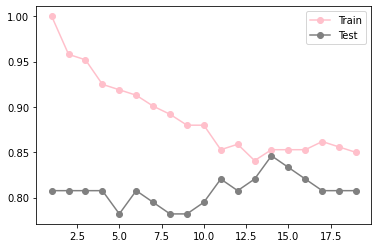

In [324]:
# Plotting the scores to check minimum difference between them

plt.plot(range(1,20),score_list_train,'-o', label = "Train",color ='pink')
plt.plot(range(1,20),score_list_test,'-o', label = "Test",color ='grey')
plt.legend()
plt.show()

In [325]:
# Here we are considering k values where train and test scores are similar

diff = pd.Series(score_list_train) - pd.Series(score_list_test)

In [326]:
# Converting difference to proper percentage and analysing

diff.sort_values()*100

# Please note we are adding 1 to get k value as per the index below which ranges from 0 to 18

13     0.669901
14     1.951952
12     2.032802
15     3.234003
10     3.234003
18     4.215754
17     4.816355
11     5.116655
16     5.416955
9      8.500809
8      9.782860
5     10.522061
6     10.602911
7     10.984061
3     11.723262
4     13.686764
2     14.425964
1     15.026565
0     19.230769
dtype: float64

**Model V(x)**

In [327]:
# Let's take top ten values rather than 4% divergence 
# As oversampling creates a difference between distribution of classes in train and test data

k_list = [14,15,13,16,11,19,18,12,17,10]

# Also we can see the values are almost similar as before

In [328]:
# Displaying classification reports for each value of k identified above 
# As we are interested in more than just accuracy

for i in range(len(k_list)):
    knn = KNeighborsClassifier(n_neighbors = k_list[i])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Here K value is',k_list[i],'.')
    print("\nClassification Report :-\n")
    print(classification_report(y_test, y_pred))
    print("\n*********************\n")

Here K value is 14 .

Classification Report :-

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.71      0.80      0.75        15
           2       0.94      0.89      0.92        38

    accuracy                           0.85        78
   macro avg       0.82      0.83      0.82        78
weighted avg       0.85      0.85      0.85        78


*********************

Here K value is 15 .

Classification Report :-

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.67      0.80      0.73        15
           2       0.94      0.89      0.92        38

    accuracy                           0.83        78
   macro avg       0.80      0.82      0.81        78
weighted avg       0.84      0.83      0.84        78


*********************

Here K value is 13 .

Classification Report :-

              precision    recall  f1-score   

- Here we can see a very good optimization on the Recall value of previous models.
- We can see that we get best results from Model-V(x)

## 6. Conclusion and improvisation:

### <center>Write your conclusion on the results.

- So, the optimum value of k comes out to be 14,17 or 18 (from Model-V(x)) keeping in consideration all the metrics in the context.
- As, values are not too low or high, chances of overfitting and underfitting are reduced. 
- The main criteria to choose the k values was Recall as we need to correctly identify patients with issues and we can take some relaxation on wrongly identifying a patient having an issue.
- Goal here is to minimise false negatives with some liberty on false positives given the context.
- To choose between these three values, discussion must take place with the stakeholders or the management but currently k value of 14 (from Model-V(x)) looks pretty decent.

### <center>Detailed  suggestions  or  improvements  or  on  quality,  quantity,  variety,  velocity,  veracity  etc.  on  the  data  points collected by the research team to perform a better data analysis in future.

- *Age of the patients can be added as many biomechanic features are quite age dependent.*
- *Gender of the patients can be added as it may affect biomechanics in some cases.*
- *Blood type can be added as it's quite related to biomechanics.*
- *As dimensions of a person can lead to lots of health issues hence,height and weight details can be provided.* 
- *Medical history of the patients can be added which can include previous or ongoing illness, accidents occured,current medications,diet etc.*
- *Family health issues relevant details can added to diagnose if issue can be genetic.*
- *Occupation/Hobby/Lifestyle of a patient can be taken into consideration as biomechanics is greatly influenced by these factors.*
- *The test data on patients should be recent along with past data provided if any.Along with it, date and time should be specified for each test.*
- *The data given should be nearly balanced.*
- *The data lacks quality in terms of relevance and timeliness.*
- *Quantity of data could be more thereby making data more balanced than current.*
- *Volumne of the data can have a gain by adding new features.*
- *Volatility of the data can't be assesed from the given dataset.*
- *Each column name should be more explainatory or extra details should be provided.*
- *The data should be shuffled and together. Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less.*
- *A decent amout of domain knowledge should be imparted along with the data so that we can handle unwanted features.*
- *Value in the data can be added by adding more relevant information as features and when these details are taken in by authentic sources(be it a machine or a human) then value is increased multi-fold.* 

# <center>SL-Project Part Two</center> 

In [329]:
# Importing the libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import GridSearchCV
from collections import Counter

## 1. Import and warehouse data:

### <center>Import all the given datasets and explore shape and size of each

In [330]:
# Importing the datasets by reading the appropriate CSV file

Data1 = pd.read_csv('Part2 - Data1.csv')
Data2 = pd.read_csv('Part2 -Data2.csv')

In [331]:
# Checking the shape of the imported datasets

print('First data set shape:',Data1.shape)
print('Second data set shape:',Data2.shape)

First data set shape: (5000, 8)
Second data set shape: (5000, 7)


In [332]:
# Checking the size of the imported datasets

print('First data set size:',Data1.size)
print('Second data set size:',Data2.size)

First data set size: 40000
Second data set size: 35000


In [333]:
# Checking the dimension of the imported datasets

print('First data set dimesnion:',Data1.ndim)
print('Second data set dimension:',Data2.ndim)

First data set dimesnion: 2
Second data set dimension: 2


In [334]:
# Checking the length of the imported datasets (Number of rows)

print('First data set length:',len(Data1))
print('Second data set length:',len(Data2))

First data set length: 5000
Second data set length: 5000


In [335]:
# Checking the information of the imported datasets

print(Data1.info())
print('\n***************************************\n')
print(Data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
None

***************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null

- Shape, size, dimension, length and information of the given datasets can be seen above. 

### <center>Merge all datasets onto one and explore final shape and size

In [336]:
# Merging the datasets

data_merged = pd.merge(Data1,Data2,on='ID')

In [337]:
# Range of the dataset

data_merged.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', length=5000)

In [338]:
# Shape of the dataset

data_merged.shape

(5000, 14)

In [339]:
# Size of the dataset

data_merged.size

70000

In [340]:
# Length of the dataset
# Number of rows

len(data_merged)

5000

In [341]:
# Information about the dataset

data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


## 2.Data cleansing:

### <center>Explore and if required correct the datatypes of each attribute

In [342]:
# Let's first create a copy of our main dataset

data = data_merged.copy()

In [343]:
# Observing the dataset 'data_merged'
# First and last 5 rows displayed

data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [344]:
# Describing the dataset
# Including all the data types

data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


- ID column is not useful in our analysis as it is redundant column which depicts data points. In our case ID represents cutomers which are our data points.

In [345]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [346]:
# Selecting the numerical type columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = data.select_dtypes(include=numerics).columns.to_list()

In [347]:
# Selecting the categorical type columns for transformation 

cat_cols = ['ZipCode','HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']


In [348]:
# Transforming categorical variables

for i in cat_cols:
    data[i]=data[i].astype('category')

In [349]:
data.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                category
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

- We can see that the changes have been made

### <center>Explore for null values in the attributes and if required drop or impute values

In [350]:
# Checking for null values

data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

- So we can see that we have NULL values for LoanOnCard column.
- As we have less missing values compared to total data points the rows related to the missing values can be dropped. 

In [351]:
# Dropping the missing values

data.dropna(axis=0,inplace=True)

In [352]:
# Checking again for missing values

data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

- As we can see that there are no more missing values.

In [353]:
# Dropping the ID column as discussed earlier

data.drop('ID',axis=1,inplace=True)

In [354]:
# Identifying duplicate records in the data

dupes = data.duplicated()
sum(dupes)

0

In [355]:
# Let's look at random samples
# Run the code multiple times to check

data.sample(10)

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
52,30,6,72,94005,1,0.1,1,207,0,0,0,0,0.0
1200,36,12,22,92507,4,1.0,1,91,1,0,1,0,0.0
3859,50,24,62,90245,1,1.4,3,0,0,0,0,0,0.0
784,48,22,98,94115,2,6.3,1,0,0,0,0,0,0.0
1202,35,11,24,95521,4,0.4,2,0,0,0,0,0,0.0
1995,35,11,41,94720,1,2.4,2,0,0,0,0,0,0.0
2707,35,9,131,90089,3,0.3,3,0,0,1,1,1,1.0
2673,54,30,88,92647,4,1.0,2,122,0,0,1,0,0.0
964,27,1,78,92037,4,2.3,3,157,1,0,1,0,0.0
4309,34,8,188,94025,1,2.9,3,0,0,0,1,0,1.0


## 3. Data analysis & visualisation:

### <center>Perform detailed statistical analysis on the data

### <center>Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

In [356]:
# Filtering numerical columns again as changes were made

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = data.select_dtypes(include=numerics).columns.to_list()

In [357]:
# Function for numeric's analysis of each column passed as a list
# Min, Max, Range, Mean, Median, Standard Deviation, Skewness, Kurtosis

def uva_num(data, data_group):
  
  ''' 
  Univariate Analysis for Numeric:
  takes a group of variables (INTEGER and FLOAT) and plots all the descriptives and properties along with KDE.\n
  
  data : dataframe from which to plot from\n
  
  data_group : {list} type Group of Continuous variables\n

  '''  

  
  size = len(data_group)
  plt.figure(figsize = (8*size,3), dpi = 100)
  
  # Looping for each variable

  for j,i in enumerate(data_group):
    
    # Calculating descriptives of variable
    
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    
    # Calculating points of standard deviation
    
    points = mean-st_dev, mean+st_dev
    
    # Plotting with every information
    
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True, color='aqua',)
    sns.lineplot(points, [0,0], color = 'yellow', label = "std_dev",linewidth = 2.5)
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i))
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),
                                                                                                    round(points[1],2)),
                                                                                                    round(kurt,2),
                                                                                                    round(skew,2),
                                                                                                    (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                    round(mean,2),
                                                                                                    round(median,2)))

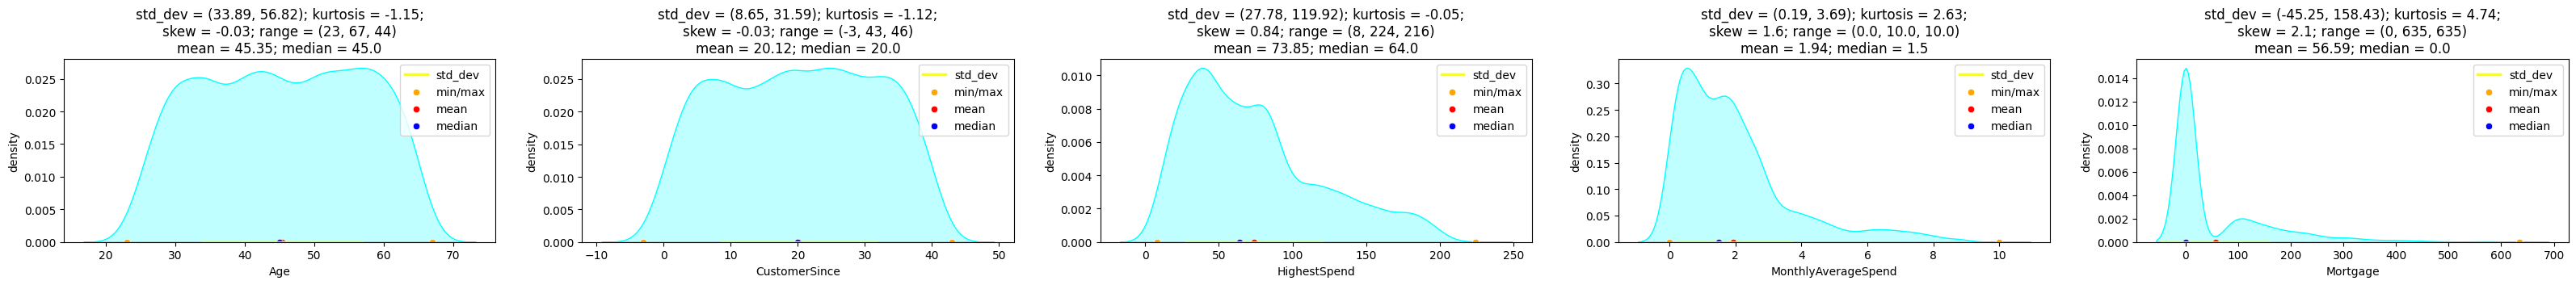

In [358]:
uva_num(data,num_cols)

- Most of the distributions are symmetric or skewed(moderately), except for 'MonthlyAverageSpend' and 'Mortgage' which are relatively highly skewed(positively and biased accordingly).
- By observing the above graphs and data we can see that most of the variables depicts Platykurtic distribution except for 'MonthlyAverageSpend' and 'Mortgage' which depicts Leptokurtic distribution.
- Kurtosis value is reasonably within the range for most with exception of 'Mortgage'.
- So,by observing both kurtosis and skewness, we can sense that in case of most of the variables we dont have outliers or very minimal except in case of 'MonthlyAverageSpend' and 'Mortgage'.
- We can see the age of most of the customers is between 34 and 57.
- Relation of a customer with the bank is quite varied and ranges from 9 to 32 years which depicts lots of loyal customer.

In [359]:
# custom function for outlier analysis

def uva_outlier(data, data_group, include_outlier = True):
  
  '''
  Univariate Analysis for Outlier:
  takes a group of variables (INTEGER and FLOAT) and plot boxplot and descriptives\n
  
  data : dataframe from which to plot from\n
  
  data_group : {list} type Group of Continuous variables\n
  
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(data_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  # Looping for each variable
  
  for j,i in enumerate(data_group):
    
    # Calculating the descriptives
    
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating number of outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      
      # Plotting with every information
      
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v",palette='gray')
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      
      # Replacing outliers with max/min whisker
      
      data2 = data[data_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # Plotting without outliers
        
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v",color='silver')
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

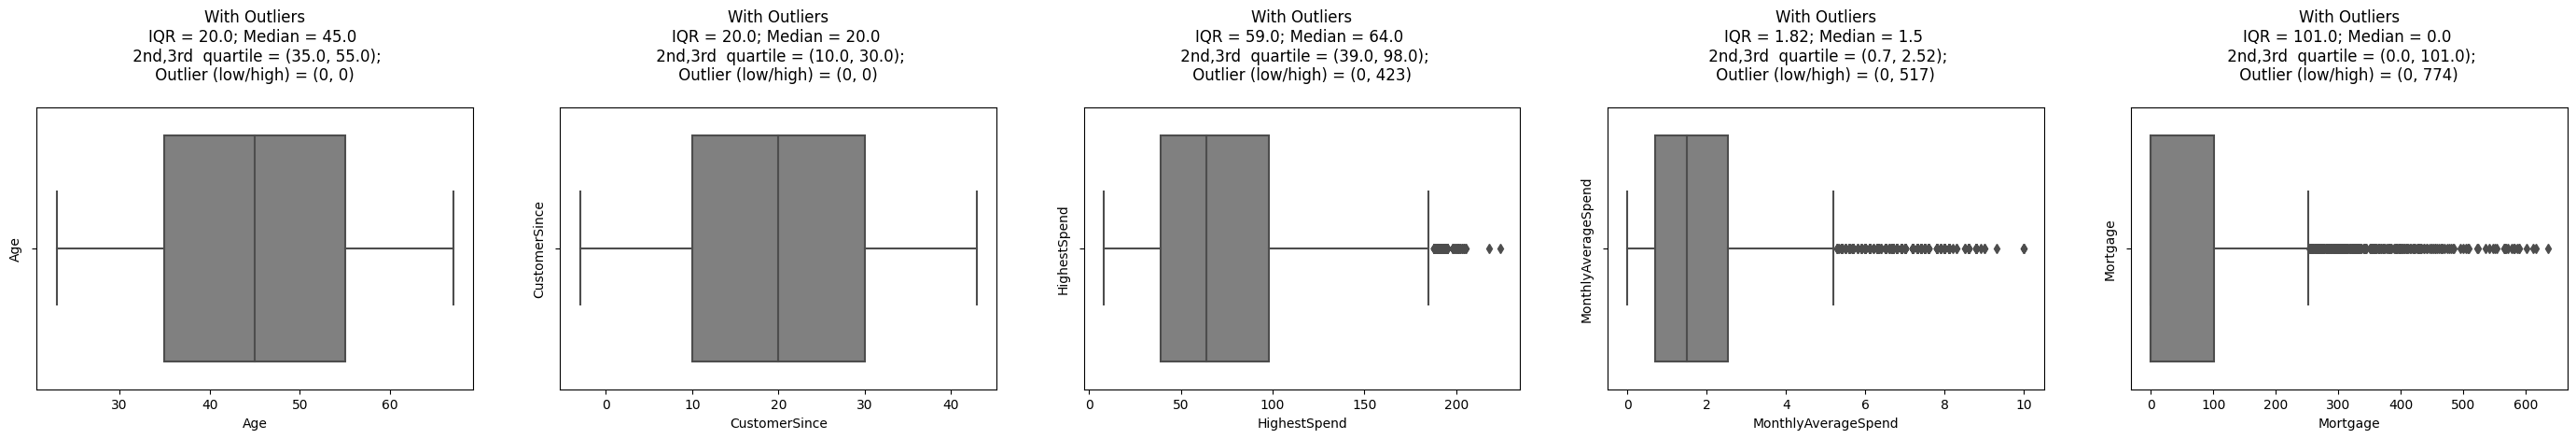

In [360]:
uva_outlier(data, num_cols)

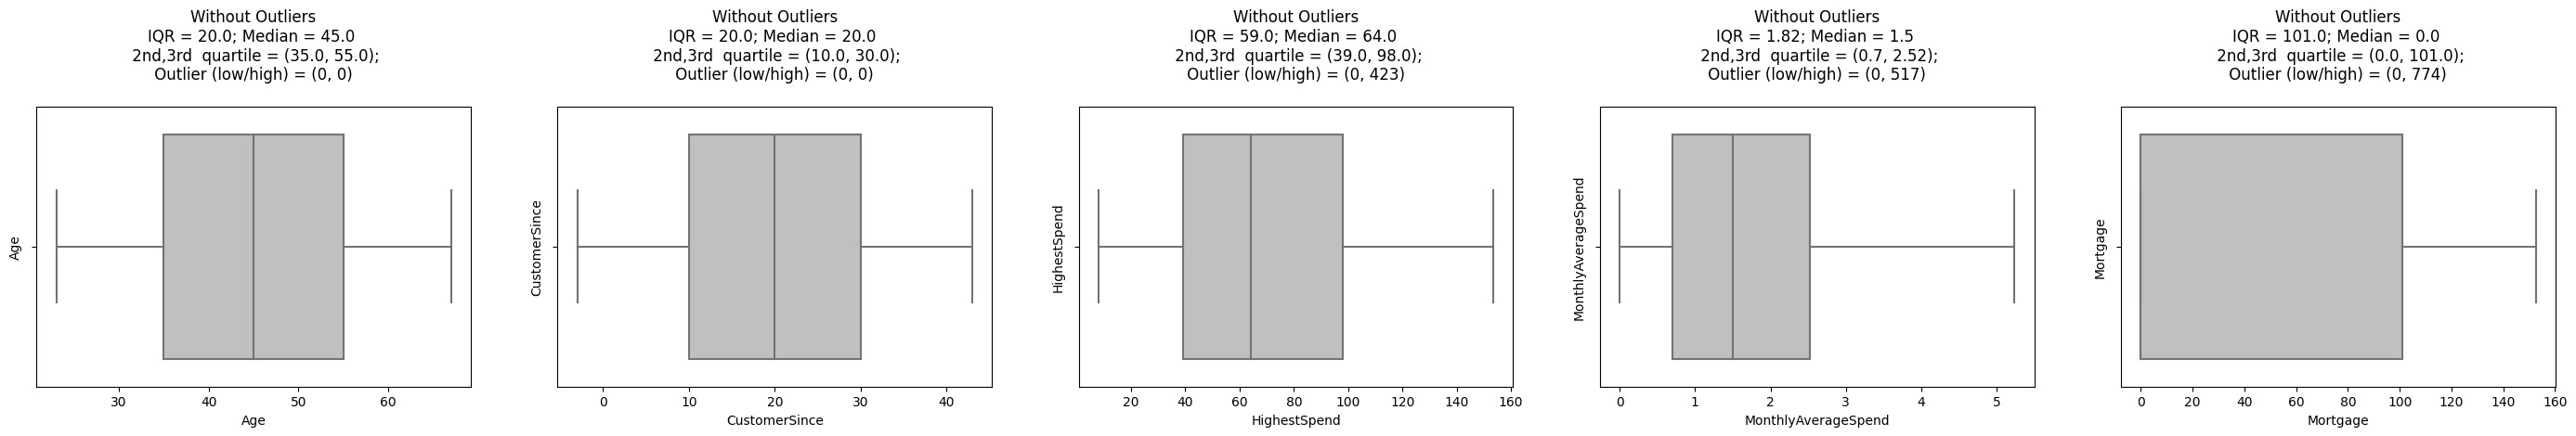

In [361]:
# Representation of data with outliers removed

uva_outlier(data, num_cols,include_outlier=False)

- Here we can see lots of high spending customers depicted by outliers.
- We can se extreme mortgage values which might be result of potential customers with big pockets.
- Also, we can see the missing lower whisker for 'Mortgage' which depicts large number of customers not having mortgage which can be shown below as well and for people who are having, the value is extreme.

In [362]:
data['Mortgage'].value_counts()

0      3447
98       17
89       16
91       16
83       16
       ... 
206       1
210       1
258       1
278       1
635       1
Name: Mortgage, Length: 347, dtype: int64

In [363]:
# Filtering categorical columns again as changes were made

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cat_cols = data.select_dtypes(exclude = numerics).columns.to_list()

In [364]:
cat_cols

['ZipCode',
 'HiddenScore',
 'Level',
 'Security',
 'FixedDepositAccount',
 'InternetBanking',
 'CreditCard',
 'LoanOnCard']

In [365]:
# Percentage of each of the three class in the data

for i in data[cat_cols].columns:
    print(data[i].value_counts(normalize=True)*100)
    print('\n**************************************\n')

94720    3.353414
94305    2.510040
95616    2.329317
90095    1.425703
93106    1.144578
           ...   
94087    0.020080
90813    0.020080
94404    0.020080
90068    0.020080
9307     0.020080
Name: ZipCode, Length: 467, dtype: float64

**************************************

1    29.437751
2    25.963855
4    24.397590
3    20.200803
Name: HiddenScore, dtype: float64

**************************************

1    41.947791
3    30.040161
2    28.012048
Name: Level, dtype: float64

**************************************

0    89.558233
1    10.441767
Name: Security, dtype: float64

**************************************

0    93.935743
1     6.064257
Name: FixedDepositAccount, dtype: float64

**************************************

1    59.718876
0    40.281124
Name: InternetBanking, dtype: float64

**************************************

0    70.562249
1    29.437751
Name: CreditCard, dtype: float64

**************************************

0.0    90.361446
1.0     9.638554
Name: L

- As we can see that classes very imbalanced, action can taken on the same later.
- Values seems moderately balanced for 'HiddenScore' and 'Level' but not for the rest.

In [366]:
def uva_cat(data, var_group):

  '''
  Univariate Analysis for Categorical:
  
  takes a group of variables (category) and plot all the value_counts and barplot along with descriptives.
  '''
  
  size = len(var_group)
  plt.figure(figsize = (9*size,2), dpi = 100)

  # Loop for every variable

  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index,palette="rocket")
    plt.xlabel('Fraction/Percent', fontsize = 15)
    plt.ylabel('{}'.format(i), fontsize = 15)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

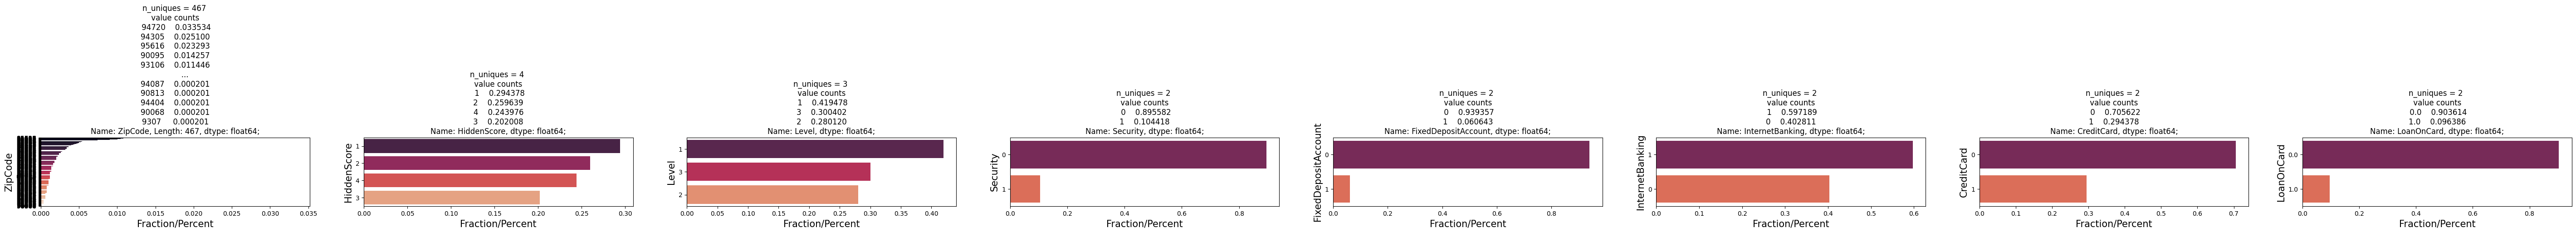

In [367]:
uva_cat(data, cat_cols)

- We can see here that top 5 zip codes shown above have almost 10% of the customers and rest 90% are distributed across rest 462.So, there are too many categories as zip codes hence not contributing to our approach.Hence, we will drop this column.
- For other columns we high moderate to highly imbalance data which shall be handled later. 

In [368]:
# Calculating correlation

corr = data[num_cols].corr()
corr

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
Age,1.000000,0.994208,-0.054951,-0.051896,-0.013272
CustomerSince,0.994208,1.000000,-0.046092,-0.049918,-0.011380
HighestSpend,-0.054951,-0.046092,1.000000,0.646109,0.207236
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,1.000000,0.110275
Mortgage,-0.013272,-0.011380,0.207236,0.110275,1.000000


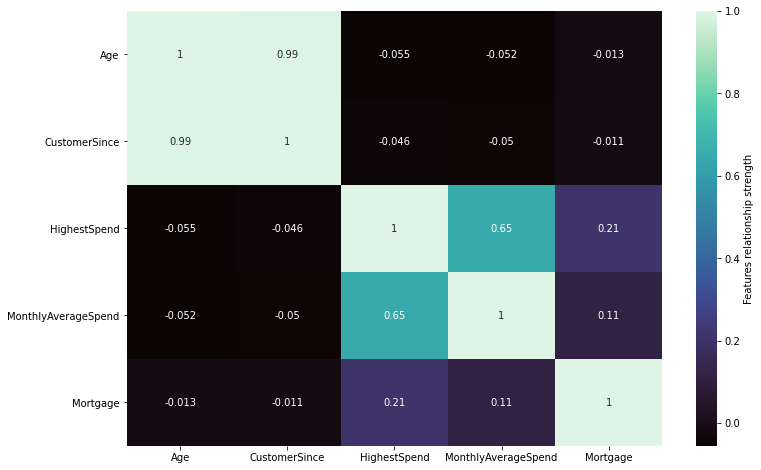

In [369]:
# Plotting the heatmap for respective correlation

plt.figure(figsize=(12,8))

sns.heatmap(corr,annot=True,cbar_kws={'label': 'Features relationship strength'},cmap='mako');

In [370]:
# Representing correlation values in hierarchy (Descending order)

df_corr = pd.DataFrame(corr.abs().unstack().sort_values(ascending=False),columns=['Correlation'])
df_corr

,,Correlation
Age,Age,1.000000
CustomerSince,CustomerSince,1.000000
MonthlyAverageSpend,MonthlyAverageSpend,1.000000
HighestSpend,HighestSpend,1.000000
Mortgage,Mortgage,1.000000
Age,CustomerSince,0.994208
CustomerSince,Age,0.994208
MonthlyAverageSpend,HighestSpend,0.646109
HighestSpend,MonthlyAverageSpend,0.646109
Mortgage,HighestSpend,0.207236


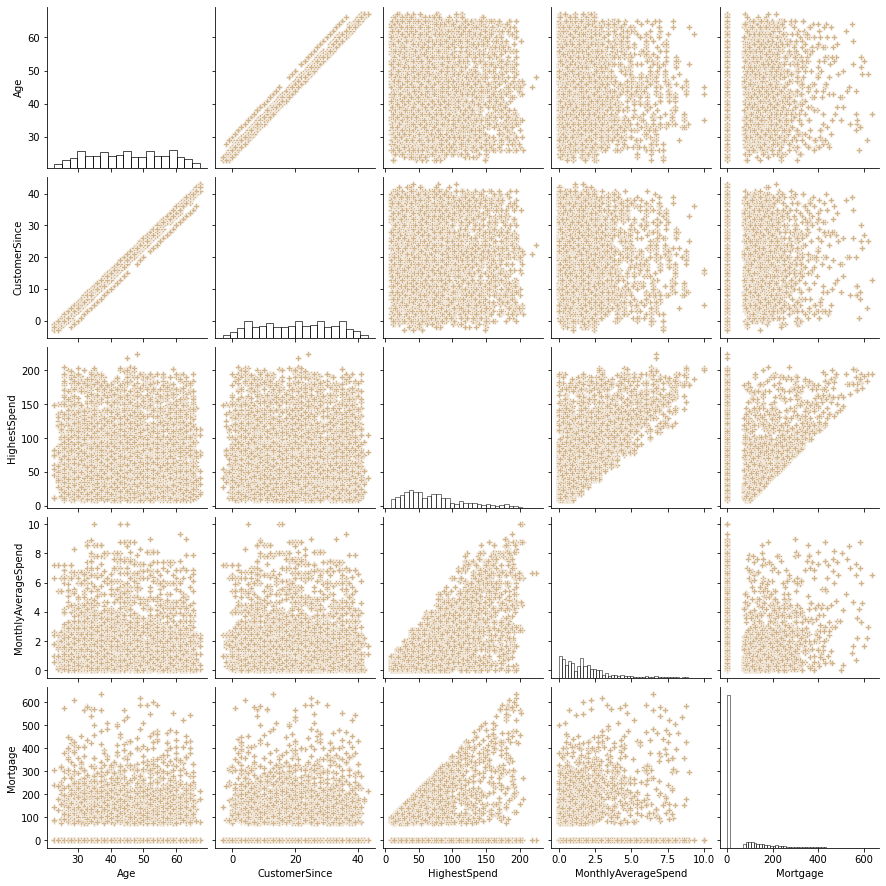

In [371]:
# Plot to check the correlation

sns.pairplot(data,diag_kind='hist',plot_kws=dict(marker="P", linewidth=0.5,color='tan'),diag_kws=dict(fill=False,color='black'));

**Observation from Correlation Matrix,Pair Plots and Heatmap :**
- We can see few decent correlations betweeen multiple columns in the correlation matrix.
- We can see moderate and strong linear relationship between columns related to spending money and age related columns respectively.
- Some of the values in the light shaded region increase almost linearly with each other owing to positive correlation.
- We do have few negative correlations but not strong enough.
- We will further exploit the relationships based on our approach.

- We shall do some hypothesis testing along with bivariate analysis now.
- Significane level is taken at default throughout.
- **Null Hypothesis**: The given variable doesn't impacts the target variable.
- **Alternate Hypothesis**: The given variable impacts the target variable.

In [372]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  Takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test.
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [373]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  Takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test.
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [374]:
def bva_cont_cat(data, cont, cat, category):
    '''
    Takes data, two variables(one continuous and other categorical) and a class of the categorical data.\n
    Calculates the two sample t and z test.\n 
    Prints the result with bar and box plot.\n
    '''

    # Creating 2 samples
    x1 = data[cont][data[cat]==category][:]
    x2 = data[cont][~(data[cat]==category)][:]

    # Calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()

    # Calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

    #Info table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)


    plt.figure(figsize = (8,5), dpi=90)

    # Plotting barplot
    plt.subplot(1,2,1)
    sns.barplot([str(category),'NOT {}'.format(category)], [m1, m2],palette='coolwarm')
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,z_p_val,table))

    # Plotting boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data,palette='vlag')
    plt.title('categorical boxplot')
  

In [375]:
# List of numerical columns

num_cols

['Age', 'CustomerSince', 'HighestSpend', 'MonthlyAverageSpend', 'Mortgage']

- We shall take two samples from the same column and perform statistical tests to check if the difference is significant in order to conclude the impact on our target variable.

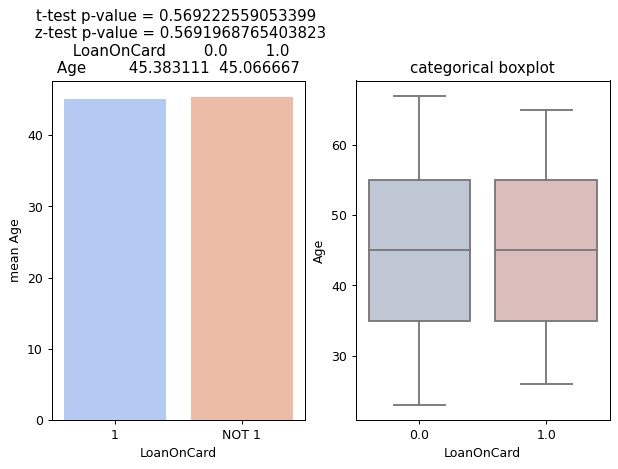

In [376]:
bva_cont_cat(data, 'Age', 'LoanOnCard', 1)

- We can see that values in both categories 1 and NOT 1 are almost evenly distributed.
- As, p value is greater than 0.05 we can conclude that difference in age has no effect on a customer having a loan.
- We accept the null hypothesis.
- So, later we will discard this column.

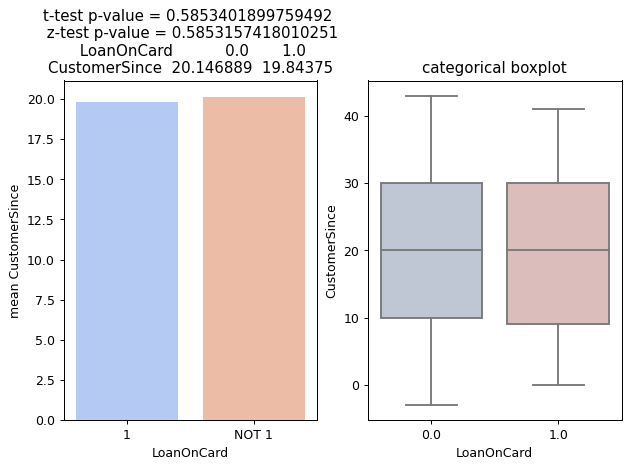

In [377]:
bva_cont_cat(data, 'CustomerSince', 'LoanOnCard', 1)

- We can see that values in both categories 1 and NOT 1 are almost evenly distributed.
- As, p value is greater than 0.05 we can conclude that difference in relationship in age has no effect on a customer having a loan.
- We accept the null hypothesis.
- So, later we will discard this column.

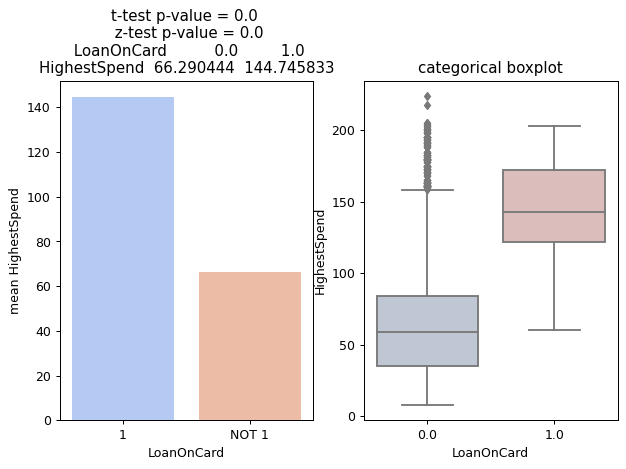

In [378]:
bva_cont_cat(data, 'HighestSpend', 'LoanOnCard', 1)

- We can see that values in both categories 1 and NOT 1 are not evenly distributed.
- As, p value is less than 0.05 we can conclude that difference in highest spending capacity of a customer has an effect on having a loan.
- We reject the null hypothesis.
- So, we will keep this column.

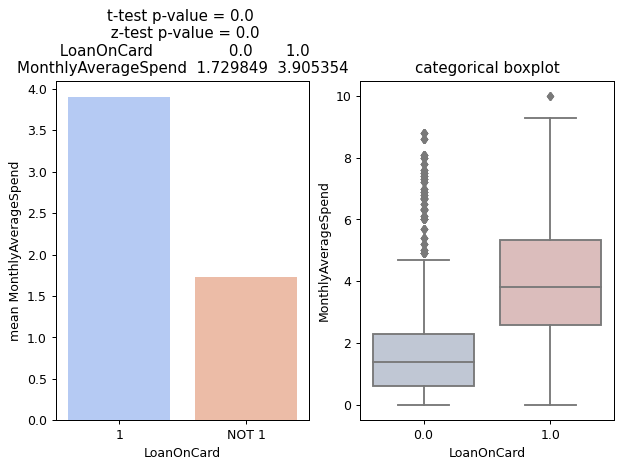

In [379]:
bva_cont_cat(data, 'MonthlyAverageSpend', 'LoanOnCard', 1)

- We can see that values in both categories 1 and NOT 1 are not evenly distributed.
- As, p value is less than 0.05 we can conclude that difference in monthly spending capacity of a customer has an effect on having a loan.
- We reject the null hypothesis.
- So, we will keep this column.

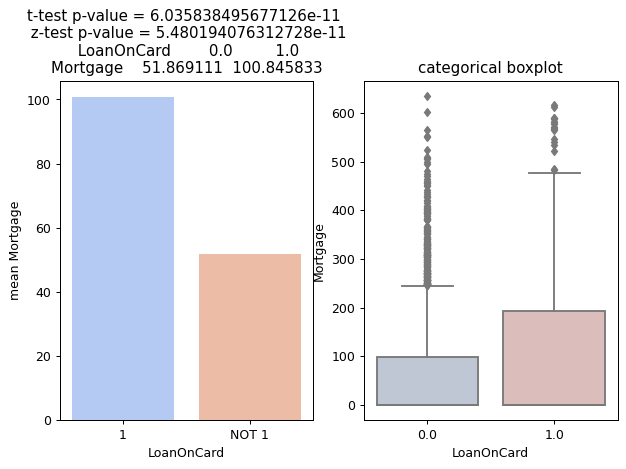

In [380]:
bva_cont_cat(data, 'Mortgage', 'LoanOnCard', 1)

- We can see that values in both categories 1 and NOT 1 are not evenly distributed.
- As, p value is less than 0.05 we can conclude that difference in mortgage value of a customer has an effect on having a loan.
- So, we will keep this column.

In [381]:
def bva_cat_cat(data, tar, cat):
  '''
  Takes data and two categorical variables.\n
  Calculates the chi2 significance between the two variables.\n 
  Prints the result with countplot and crosstab.\n
  '''
  # Isolating the variables
  data = data[[cat,tar]][:]

  # Forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  # Performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  # Checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  # Plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data,palette='viridis')
  plt.title("p-value = {}\n Is the difference significant ? = {}\n".format(round(p,8),sig))

  # Plotting percent stacked bar plot
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()  
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [382]:
# List of categorical columns

cat_cols

['ZipCode',
 'HiddenScore',
 'Level',
 'Security',
 'FixedDepositAccount',
 'InternetBanking',
 'CreditCard',
 'LoanOnCard']

- We will now do bivariate analysis among categorical variables along with hypothesis tests to determine the significance of an independent variable for our target variable. 

In [383]:
# Commenting out the code as it takes quite some time to run as number of data points are too high
# Inferences have been stated below
# bva_cat_cat(data, 'LoanOnCard', 'ZipCode')

- We could see that few zip codes have more customers and rest are evenly distributed.
- As previously discussed, the column 'ZipCode' will be dropped.
- We accept the null hypothesis here as p value is greater than 0.05.

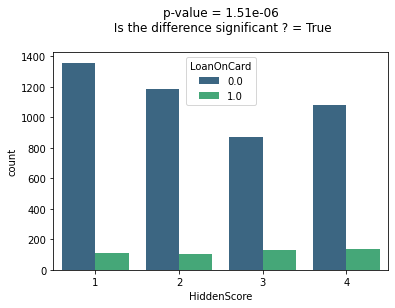

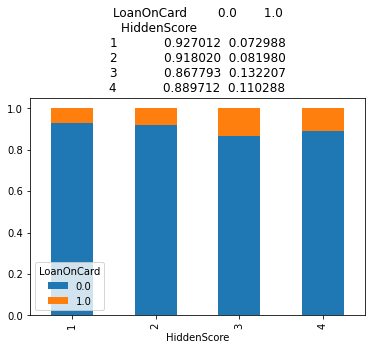

In [384]:
bva_cat_cat(data, 'LoanOnCard', 'HiddenScore')

- We can see that values in all the classes are not evenly distributed.(Compare the second plot)
- As, p value is less than 0.05 we can conclude that difference in classes of the given variable has an effect on having a loan.
- We reject the null hypothesis.
- So, we will keep this column.

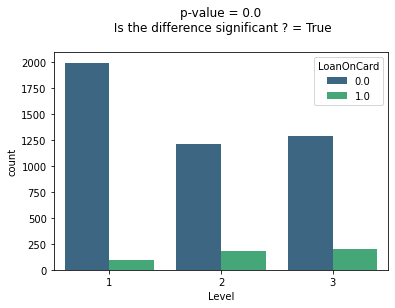

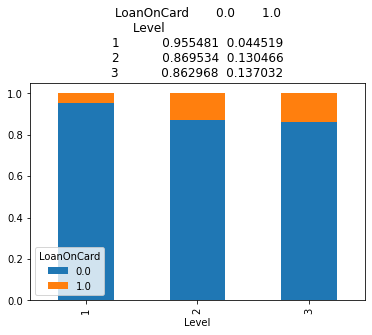

In [385]:
bva_cat_cat(data, 'LoanOnCard', 'Level')

- We can see that values in all the classes are not evenly distributed.(Compare the second plot)
- As, p value is less than 0.05 we can conclude that difference in classes of the given variable has an effect on having a loan.
- We reject the null hypothesis.
- So, we will keep this column.

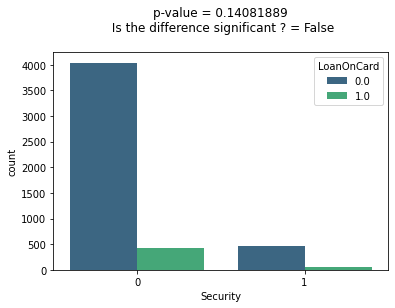

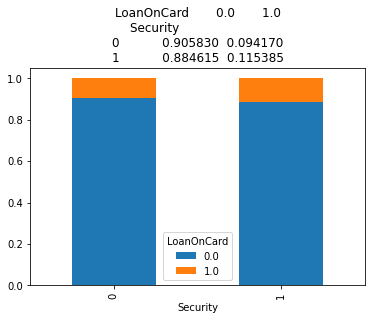

In [386]:
bva_cat_cat(data, 'LoanOnCard', 'Security')

- We can see that values in all the classes are evenly distributed.(Compare the second plot)
- As, p value is greater than 0.05 we can conclude that difference in classes of the given variable has no effect on having a loan.
- We accept the null hypothesis.
- So, we will discard this column.

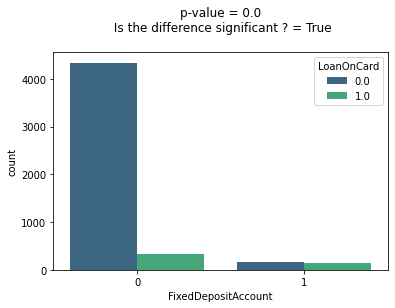

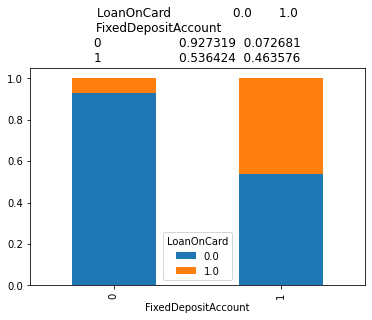

In [387]:
bva_cat_cat(data, 'LoanOnCard', 'FixedDepositAccount')

- We can see that values in all the classes are not evenly distributed.(Compare the second plot)
- As, p value is less than 0.05 we can conclude that difference in classes of the given variable has an effect on having a loan.
- We reject the null hypothesis.
- So, we will keep this column.

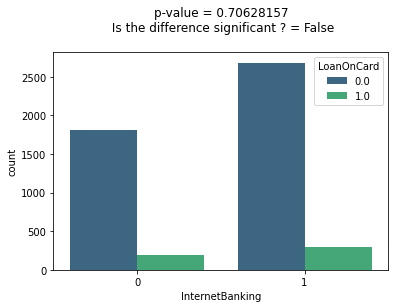

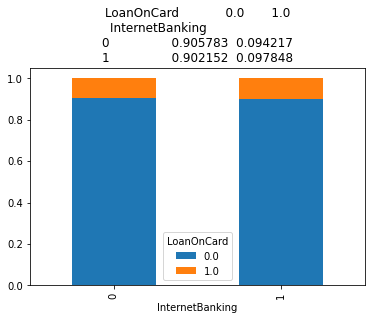

In [388]:
bva_cat_cat(data, 'LoanOnCard', 'InternetBanking')

- We can see that values in all the classes are evenly distributed.(Compare the second plot)
- As, p value is greater than 0.05 we can conclude that difference in classes of the given variable has no effect on having a loan.
- We accept the null hypothesis.
- So, we will discard this column.

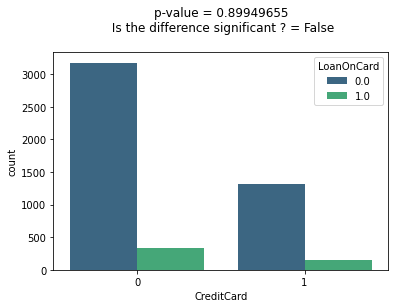

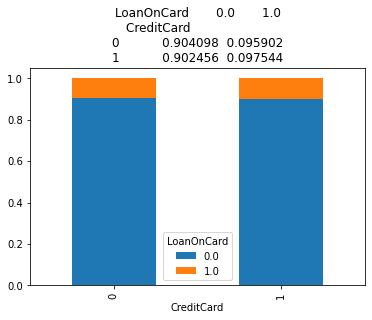

In [389]:
bva_cat_cat(data, 'LoanOnCard', 'CreditCard')

- We can see that values in all the classes are evenly distributed.(Compare the second plot)
- As, p value is greater than 0.05 we can conclude that difference in classes of the given variable has no effect on having a loan.
- We accept the null hypothesis.
- So, we will discard this column.

- We can see that 'Age','CustomerSince' and 'ZipCode' have no effect on the target variable as seen in the above data and graphs. So we will drop these.

- We can see that 'Age','CustomerSince' and 'ZipCode' have no effect on the target variable as seen in the above data and graphs. So we will drop these.

In [390]:
data.drop(['Age','CustomerSince'],axis=1,inplace=True)
data.drop(['ZipCode','CreditCard','InternetBanking','Security'],axis=1,inplace=True)

In [391]:
# Filtering numerical columns again as changes were made

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = data.select_dtypes(include = numerics).columns.to_list()

# Filtering categorical columns again as changes were made

cat_cols = data.select_dtypes(exclude = numerics).columns.to_list()


In [392]:
# List of numerical columns

num_cols

['HighestSpend', 'MonthlyAverageSpend', 'Mortgage']

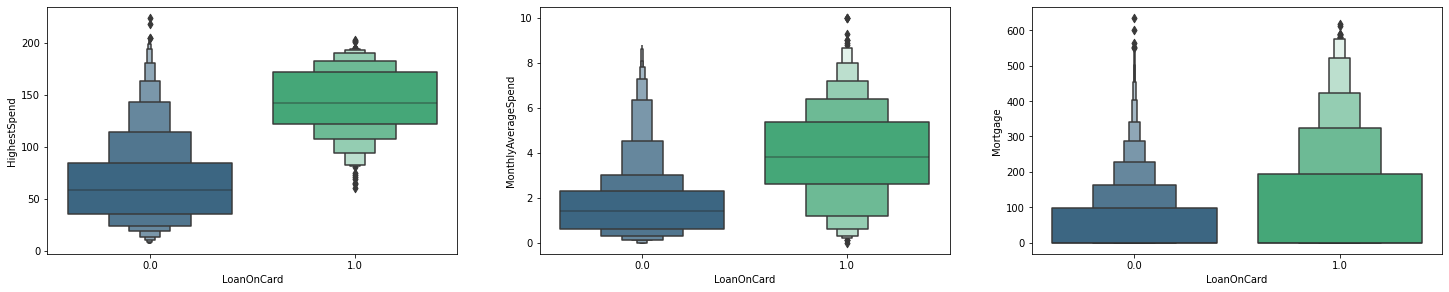

In [393]:
#Creating plot for each numerical variable after filtering

plt.figure(figsize=(25,10))
for i, j in enumerate(data[num_cols]):
    plt.subplot(2,3,i+1)
    sns.boxenplot(x='LoanOnCard', y=j, data=data,palette='viridis')

In [394]:
# List of categorical columns

cat_cols

['HiddenScore', 'Level', 'FixedDepositAccount', 'LoanOnCard']

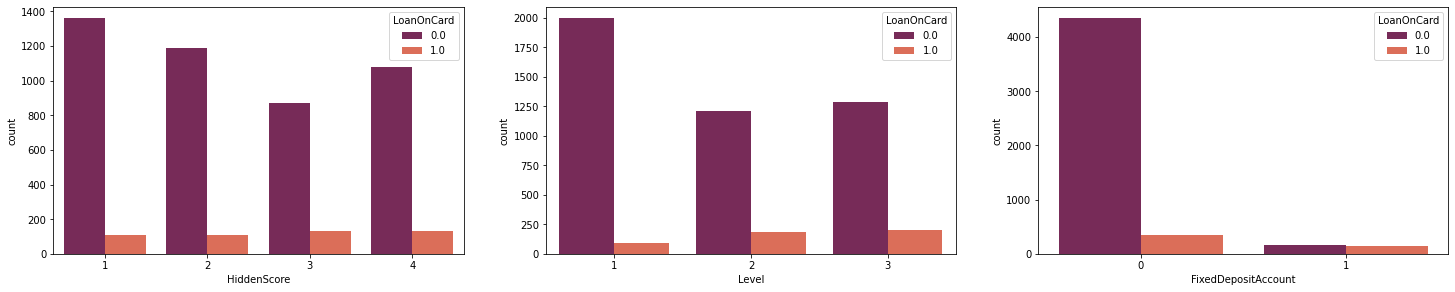

In [395]:
# Creating plot for each categorical variable after filtering

plt.figure(figsize=(25,10))
for i, j in enumerate(data[['HiddenScore', 'Level', 'FixedDepositAccount']]):
    plt.subplot(2,3,i+1)
    sns.countplot(x = j, data = data,hue='LoanOnCard',palette='rocket')

- So, finally we have 6 variables for our modelling.

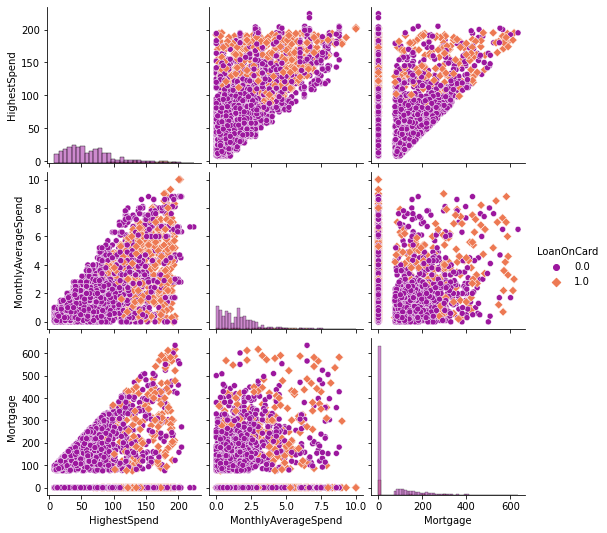

In [396]:
# Plot to check the correlation after filtering variables

sns.pairplot(data,hue='LoanOnCard',markers=['o', 'D'],diag_kind='hist',palette='plasma');

- We can that customer having loans as data points are in scarcity and scattered.
- We can observe that most of the customers don't have a loan.
- Partial linearity can only be seen for customers who do't have a loan.

In [397]:
data.corr()

,HighestSpend,MonthlyAverageSpend,Mortgage
HighestSpend,1.000000,0.646109,0.207236
MonthlyAverageSpend,0.646109,1.000000,0.110275
Mortgage,0.207236,0.110275,1.000000


In [398]:
def mva_cont_cat_cat(data, cont, cat1, cat2):
    # Boxplot
    # For multivariate analysis
    plt.figure(figsize=(8,5),dpi=90)
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v',palette='husl')
    plt.title('MVA')


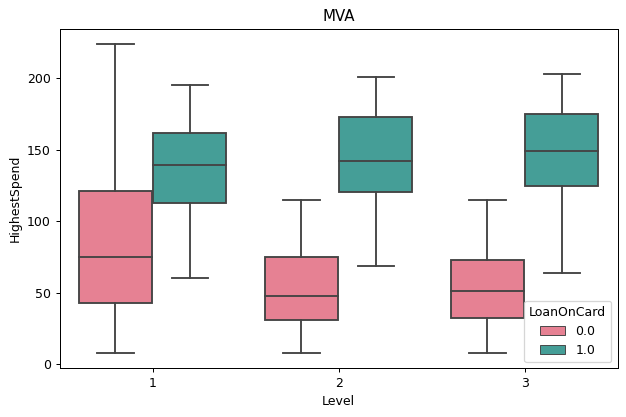

In [399]:
mva_cont_cat_cat(data,'HighestSpend','Level','LoanOnCard')

- We can see that most customers on different levels having a loan have a high spending ability particularly more at level 2 and 3.

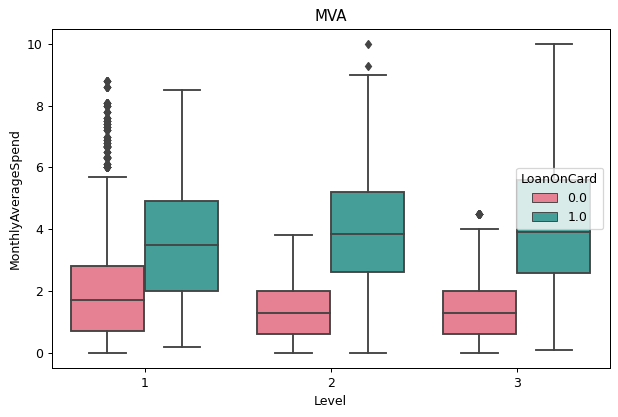

In [400]:
mva_cont_cat_cat(data,'MonthlyAverageSpend','Level','LoanOnCard')

- We can see that most customers on different levels having a loan have a high monthly spending ability,though there may be few outliers as exception.

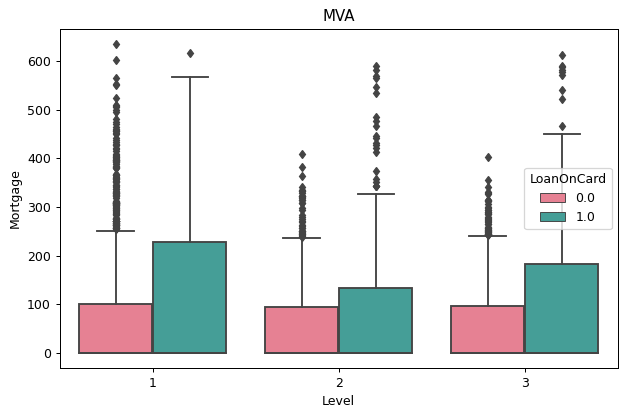

In [401]:
mva_cont_cat_cat(data,'Mortgage','Level','LoanOnCard')

- We can observe that customers having loan have a higher mortgage amomgst different levels.

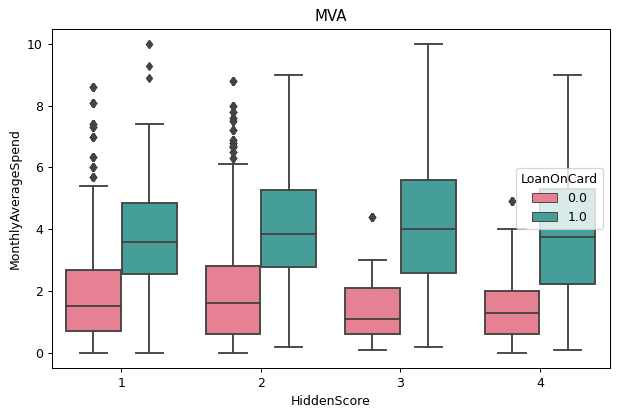

In [402]:
mva_cont_cat_cat(data,'MonthlyAverageSpend','HiddenScore','LoanOnCard')

- For all the score values,customers having loan have higher spending capacity either monthly or highest as both are well correlated. 

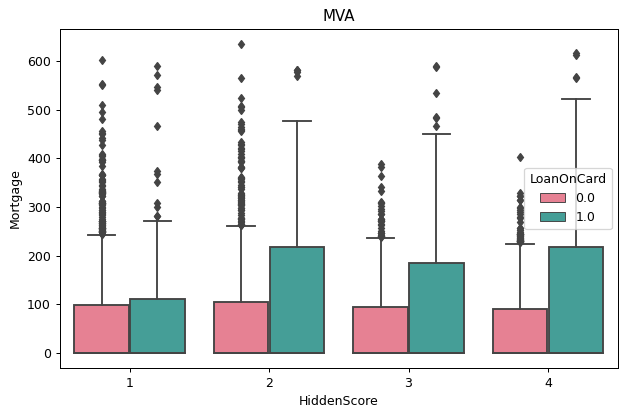

In [403]:
mva_cont_cat_cat(data,'Mortgage','HiddenScore','LoanOnCard')

- For all the score values, we can see that for customers who have loan have a higher mortgage value compared to those who don't though there may be few outliers as exceptions.

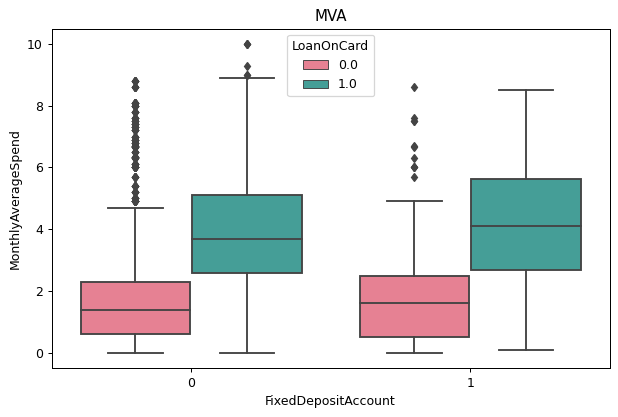

In [404]:
mva_cont_cat_cat(data,'MonthlyAverageSpend','FixedDepositAccount','LoanOnCard')

- For all the customers having fixed deposit and having loan, have higher spending capacity either monthly or highest as both are well correlated. 

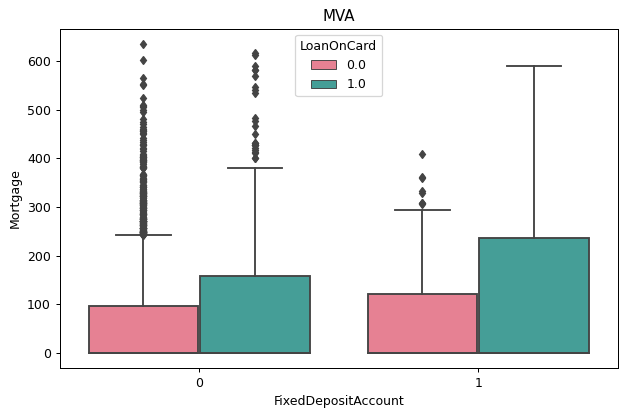

In [405]:
mva_cont_cat_cat(data,'Mortgage','FixedDepositAccount','LoanOnCard')

- For all the customers having fixed deposit and having loan, have loan have a higher mortgage value compared to those who don't though there may be few outliers as exceptions.

- At the end, we could have also checked for multicollinearity(in case of Logistic Regression) in our data but as our Gaussian Naive Bayes doesn't take it into account by it's assumptions so we will remain neutral here for this step for both the algorithms.

## 4. Data pre-processing:

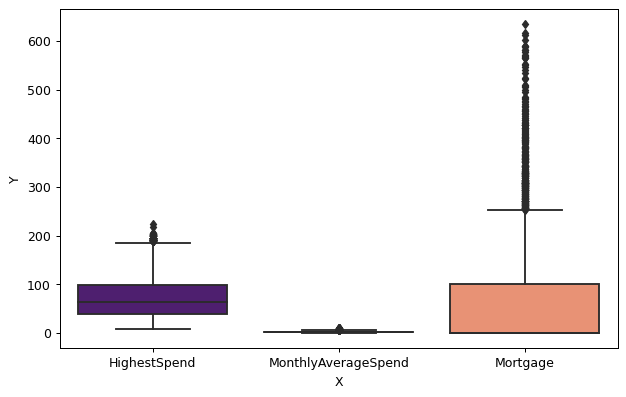

In [406]:
# Checking again for outliers for it's treatment 

data_melt = pd.melt(data, id_vars=cat_cols, value_vars=num_cols, var_name='X', value_name='Y')
plt.figure(figsize=(8,5), dpi=90)
sns.boxplot(y='Y', x='X', data=data_melt,palette='magma')
plt.show()

In [407]:
# Replacing outliers with upper whisker value

for i in num_cols:
    data[i].quantile(0.25), data[i].quantile(0.75)
    IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    whisker_1 = Q1 - (1.5*IQR)
    whisker_2 = Q3 + (1.5*IQR)
    data[i].loc[data[i]>whisker_2] = whisker_2

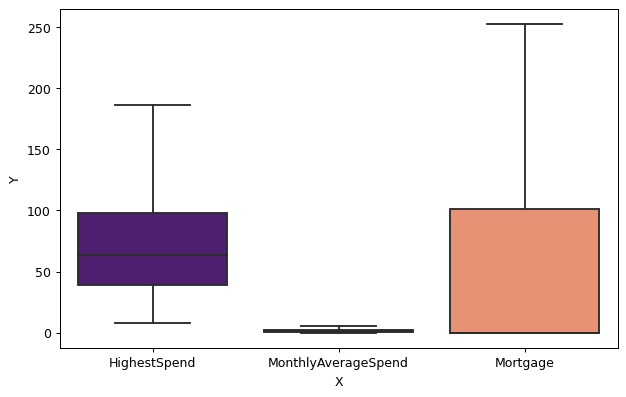

In [408]:
# Checking again for changes done

data_melt = pd.melt(data, id_vars=cat_cols, value_vars=num_cols, var_name='X', value_name='Y')
plt.figure(figsize=(8,5), dpi=90)
sns.boxplot(y='Y', x='X', data=data_melt,palette='magma')
plt.show()

- We can see that outliers are gone.
- Replaced the outliers value to prevent the loss of data. 

### <center>Segregate predictors vs target attributes

In [409]:
# Segregating predictors and target attribute

X = data.drop(labels= 'LoanOnCard' , axis = 1)
y = data['LoanOnCard']

In [410]:
X.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount
9,180.0,1,5.2625,3,0.0,0
10,105.0,4,2.4000,3,0.0,0
11,45.0,3,0.1000,2,0.0,0
12,114.0,2,3.8000,3,0.0,0
13,40.0,4,2.5000,2,0.0,0


In [411]:
y.head()

9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: LoanOnCard, dtype: category
Categories (2, float64): [0.0, 1.0]

### <center>Check for target balancing and fix it if found imbalanced

In [412]:
# The distribution of data points across classes of 'Class'

data.groupby(['LoanOnCard']).count()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount
LoanOnCard,,,,,,
0.0,4500,4500,4500,4500,4500,4500
1.0,480,480,480,480,480,480


In [413]:
data['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

- As can be seen from the information above the classes are not balanced and there is actually hugh imbalance.

In [414]:
# Resampling the data
# Oversampling to avoid loss of data

smotenc=SMOTENC(categorical_features=[1,3,5],random_state=5)
X_bal,y_bal=smotenc.fit_resample(X,y)

In [415]:
X_bal.shape

(9000, 6)

In [416]:
y_bal.shape

(9000,)

In [417]:
y_bal.value_counts()

0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64

- We can see that our classes are balanced now.
- Here we used oversampling to prevent the loss of data.
- **Note: Just demonstrating here how to balance the class using oversampling and we shall do oversampling after the train-test split as we only need to balance the training data owing to the reason that the test data is future data and we don't know if the data will come as balanced or imbalanced.**

### <center>Perform train-test split

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5,stratify=y,test_size=0.2)

In [419]:
# Training data before oversampling

print(X_train.shape)
print(y_train.shape)

(3984, 6)
(3984,)


In [420]:
# Testing data

print(X_test.shape)
print(y_test.shape)

(996, 6)
(996,)


In [421]:
# Resampling the data(only training data)
# Oversampling to avoid loss of data

smotenc=SMOTENC(categorical_features=[1,3,5],random_state=5)
X_train,y_train=smotenc.fit_resample(X_train,y_train)
counter = Counter(y_train)
print(counter)

Counter({0.0: 3600, 1.0: 3600})


In [422]:
# Training data after oversampling

print(X_train.shape)
print(y_train.shape)

(7200, 6)
(7200,)


In [423]:
# Testing data

print(X_test.shape)
print(y_test.shape)

(996, 6)
(996,)


## 5. Model training, testing and tuning:

### <center>Design and train a Logistic regression and Naive Bayes classifiers

**Model-I**

In [424]:
# Instantiating the model
# Training the Logistic Regression model

logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

**Model-II**

In [425]:
# Instantiating the model
# Training the Gaussian Naive Bayes model

gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

### <center>Display the classification accuracies for train and test data

In [426]:
# Predicting the response on training and test data

logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.905
Accuracy on Test data: 0.8945783132530121


In [427]:
# Predicting the response on training and test data

gnb_pred = gnb.predict(X_test)

print('Accuracy on Training data:',gnb.score(X_train, y_train) )
print('Accuracy on Test data:',gnb.score(X_test, y_test) )

Accuracy on Training data: 0.8508333333333333
Accuracy on Test data: 0.8534136546184738


### <center>Display and explain the classification report in detail

In [428]:
# Classification report for Logistic Regression

print("Classification Report :\n")
print(classification_report(y_test, logit_pred))

Classification Report :

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94       900
         1.0       0.48      0.91      0.62        96

    accuracy                           0.89       996
   macro avg       0.73      0.90      0.78       996
weighted avg       0.94      0.89      0.91       996



In [429]:
# Classification report for Gaussian Naive Bayes 

print("Classification Report :\n")
print(classification_report(y_test, gnb_pred))

Classification Report :

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91       900
         1.0       0.38      0.79      0.51        96

    accuracy                           0.85       996
   macro avg       0.68      0.83      0.71       996
weighted avg       0.92      0.85      0.87       996



- According to our context,the  bank  is  interested  in  expanding  the borrowers  base  rapidly  to  bring  in  more  business  via  loan  interests.
- So the bank is interested more to identify the customers correctly who will avail loan.
- So in the classification report we will mostly focus on Recall metric.
- As we can see the values for Recall is pretty good for Logistic Regression model and very decent for Gaussian Naive Bayes model.
- We can also see a good balance between Precision and Recall which can said from f1-score too.
- Also, as our test data is imbalanced we can also keep an eye on macro avg which is affected by class imbalances.
- Let's see if we can improve this further.

### <center>Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model

### <center>Logistic Regression

In [430]:
# Tuning the hyperparameters

penalty = ['l1', 'l2']

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 

solver = ['liblinear', 'saga'] 

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

logistic = LogisticRegression()

grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1) 

grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_) 


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Score:  0.9056944444444446
Best Params:  {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


**Model-III**

In [431]:
# Training the Logistic Regression model

logit = LogisticRegression(C = 0.1,class_weight={1: 0.5, 0: 0.5},penalty = 'l1',solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, penalty='l1',
                   solver='liblinear')

In [432]:
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9059722222222222
Accuracy on Test data: 0.8975903614457831


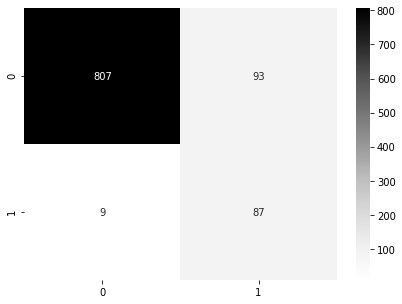

In [433]:
# Generating confusion matrix and plotting as heatmap

cm = confusion_matrix(y_test, logit_pred)
cm
df_cm = pd.DataFrame(cm, index = [0,1],
                  columns = [i for i in ['0','1']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Greys')
plt.show()

In [434]:
# Classification report for Logistic Regression

print("Classification Report :\n")
print(classification_report(y_test, logit_pred))

Classification Report :

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       900
         1.0       0.48      0.91      0.63        96

    accuracy                           0.90       996
   macro avg       0.74      0.90      0.79       996
weighted avg       0.94      0.90      0.91       996



- After hyperparameter tuning we can see that the Recall has increased for class '0' and we can see slight increase in f1-score and macro avg. 

### <center>Gaussian NB

In [435]:
# Tuning the hyperparameters

var_smoothing = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]

param_grid = dict(var_smoothing=var_smoothing)

gnb = GaussianNB()

grid = GridSearchCV(estimator=gnb, param_grid=param_grid, verbose=1, n_jobs=-1,scoring='accuracy',cv=5)

grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_) 


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Score:  0.8774999999999998
Best Params:  {'var_smoothing': 1e-05}


**Model-IV**

In [436]:
# Training the Gaussian Naive Bayes model

gnb = GaussianNB(var_smoothing= 1e-05)
gnb.fit(X_train, y_train.ravel())

GaussianNB(var_smoothing=1e-05)

In [437]:
gnb_pred = gnb.predict(X_test)

print('Accuracy on Training data:',gnb.score(X_train, y_train) )
print('Accuracy on Test data:',gnb.score(X_test, y_test) )

Accuracy on Training data: 0.8776388888888889
Accuracy on Test data: 0.8724899598393574


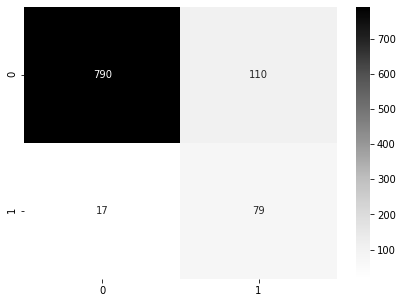

In [438]:
# Generating confusion matrix and plotting as heatmap

cm = confusion_matrix(y_test, gnb_pred)
cm
df_cm = pd.DataFrame(cm, index = [0,1],
                  columns = [i for i in ['0','1']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Greys')
plt.show()

In [439]:
# Classification report for Gaussian Naive Bayes 

print("Classification Report :\n")
print(classification_report(y_test, gnb_pred))

Classification Report :

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93       900
         1.0       0.42      0.82      0.55        96

    accuracy                           0.87       996
   macro avg       0.70      0.85      0.74       996
weighted avg       0.92      0.87      0.89       996



- We can see that values for each metric under consideration as stated before has increased by decent margin after hyperparameter tuning.

### 6. Conclusion and improvisation:

### <center>Write your conclusion on the results

- We have already discusses which metrics have been prioritised given the context.
- Seeing the above displayed metric values for each model namely I, II, III and IV we can conclude that Model-III which corresponds to the hyperparameters tuned Logistic Regression model performs the best amongst all.

### <center>Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future

- *Occupation of the customer can be taken into consideration which in turn depicts the reason and abililty of a person to take a loan.*
- *Income of the customer can be taken into consideration.*
- *Family details can be relevant here like total famil income, married or not, having kids or not,number of family members, number of kids etc.*
- *Previous loan details if any can be included.*
- *Average balance of the customer information can be added in terms of monthly,quarterly,semi-anually and annually.*
- *Mode and time of communication related features can be included at very granular level which helps bank to ascertain it's approach.*
- *Educational background can be added to check how to give the proposition to a particular customer.*
- *We can have a new variable which can depict Bank's effort towards a particular customer on a standard scale or if not can be scaled later by us.*
- *Geographical factors can also affect the customer's ability to take a loan and hence can be included.*
- *Credit history can be taken in to account which is quite a strong factor*
- *Current employment/self-employment status can be considered too.*
- *In terms of quality the data lacks in terms of completeness and timeliness.*
- *Volume of the data can be improved by adding new features mentioned above.*
- *Quantity total depends on the total number of customers in the bank so it's fixed.*
- *Our dataset is quite volatile or could be more after adding new features and hence velocity of the data comes into the picture and should be handled appropriately or it can lead to quite a big lag between decision, implementation and outcome leading to non-accomplishment of goals.*
- *Value in the data can be added by adding more relevant information as features and when these details are taken in by authentic sources(be it a machine or human) then value is increased multi-fold.* 
